In [85]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

Dataset contains below columns

scheme_name: The name of the mutual fund scheme
min_sip: The minimum amount required for a Systematic Investment Plan (SIP) investment in the fund
min_lumpsum: The minimum amount required for a lump sum investment in the fund
expense_ratio: The expense ratio of the fund
fund_size_cr: The size of the fund in crore (10 million) units
fund_age_yr: The age of the fund in years
fund_manager: The name of the fund manager
sortino: The Sortino ratio of the fund, which measures the risk-adjusted return of the fund
alpha: The alpha of the fund, which measures the excess return of the fund compared to its benchmark
sd: The standard deviation of the fund's returns
beta: The beta of the fund, which measures the sensitivity of the fund's returns to the market
sharpe: The Sharpe ratio of the fund, which measures the risk-adjusted return of the fund relative to a risk-free asset
risk_level: The risk level of the fund, categorized as Very High,High, Moderately High, Moderately Low, or Low
amc_name: The name of the asset management company that manages the fund
rating: The rating of the fund on a scale of 1 to 5, with 1 being the lowest and 5 being the highest
category: The category of the fund, such as Equity, Debt, or Hybrid
sub_category: The sub-category of the fund, such as Large Cap, Small Cap, Floater Mutual Funds, etc.
returns_1yr: The return of the fund in the past year
returns_3yr: The return of the fund in the past 3 years
returns_5yr: The return of the fund in the past 5 years

In [86]:
df= pd.read_csv('C:/Users/Dell/Downloads/machine learning/smartwealth.csv',na_values='-')
df.head()

scheme_name  min_sip  min_lumpsum  \
0  Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...      100          100   
1                     Aditya Birla SL Arbitrage Fund     1000         1000   
2     Aditya Birla SL Asset Allocator FoF-Dir Growth     1000         1000   
3   Aditya Birla SL Bal Bhavishya Yojna – Dir Growth      500         1000   
4            Aditya Birla SL Balanced Advantage Fund      100          100   

   expense_ratio  fund_size_cr  fund_age_yr        fund_manager  sortino  \
0           0.27          10.0           10      Kaustubh Gupta     0.32   
1           0.36        4288.0           10    Lovelish Solanki     1.33   
2           0.53         157.0           10  Vinod Narayan Bhat     3.44   
3           0.76         637.0            4         Atul Penkar     2.18   
4           0.61        6386.0           10        Mohit Sharma     3.69   

   alpha     sd  beta  sharpe  risk_level                           amc_name  \
0   2.24   9.39  0.01    0.24           3  Aditya Birla Sun Life Mutual Fund   
1   1.53   0.72  0.56    1.10           1  Aditya Birla Sun Life Mutual Fund   
2   2.67  10.58  0.67    1.42           5  Aditya Birla Sun Life Mutual Fund   
3  -6.37  14.99  0.85    0.90           6  Aditya Birla Sun Life Mutual Fund   
4   1.99  10.38  0.68    1.39           6  Aditya Birla Sun Life Mutual Fund   

   rating           category                                    sub_category  \
0       3              Other                                   FoFs Domestic   
1       3             Hybrid                          Arbitrage Mutual Funds   
2       3              Other                                   FoFs Domestic   
3       2  Solution Oriented                                 Childrens Funds   
4       4             Hybrid  Dynamic Asset Allocation or Balanced Advantage   

   returns_1yr  returns_3yr  returns_5yr  
0          4.0          6.5          6.9  
1          5.6          4.8          5.5  
2          2.0         18.9          9.7  
3         -0.7         17.1          NaN  
4          4.5         18.6          9.7

In [87]:
df['risk_level'].replace({1:'Low',2:'Moderately Low',3:'Moderate',4:'Moderately High',5:'High',6:'Very High'},inplace=True)

In [88]:
# checking the size of data (rows,columns)
df.shape

(814, 20)

In [89]:
# checking for missing values and column datatypes are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        791 non-null    float64
 8   alpha          772 non-null    float64
 9   sd             790 non-null    float64
 10  beta           772 non-null    float64
 11  sharpe         791 non-null    float64
 12  risk_level     814 non-null    object 
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [90]:
# checking for missing values
df.isnull().sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino           23
alpha             42
sd                24
beta              42
sharpe            23
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      167
dtype: int64

We will try to find why sortino, alpha, sd,beta,share,returns_3yr and returns_5yr data is missing

In [91]:
# checking for duplicate rows if any
df.duplicated().sum()

0

In [92]:
# Lets investigate why there are missing values in returns_3yr and returns_5yr
df[df['returns_3yr'].isnull()]

scheme_name  min_sip  min_lumpsum  \
61                              AXIS Floater Fund     1000         5000   
104    Baroda BNP Paribas Banking & PSU Bond Fund      500         5000   
125  BHARAT Bond FOF – April 2025 – Direct Growth      500         1000   
154                              DSP Floater Fund      500          500   
398            Invesco India Medium Duration Fund     1000         1000   
411                   ITI Banking & PSU Debt Fund      500         5000   
412                         ITI Dynamic Bond Fund      500         5000   
417                 ITI Ultra Short Duration Fund      500         5000   
495         Mahindra Manulife Short Duration Fund      500         1000   
497         Mirae Asset Banking and PSU Debt Fund     1000         5000   
499               Mirae Asset Corporate Bond Fund     1000         5000   
509                 Mirae Asset Money Market Fund     1000         5000   
514         Mirae Asset Ultra Short Duration Fund     1000         5000   
631                   SBI Floating Rate Debt Fund      500         5000   
689                       Sundaram Large Cap Fund      100          100   
720                       Tata Floating Rate Fund      150         5000   
755               TRUSTMF Banking & PSU Debt Fund     1000         1000   
756                           TRUSTMF Liquid Fund     1000         1000   
757                       TRUSTMF Short Term Fund     1000         1000   
769                    Union Medium Duration Fund      500         1000   
770                       Union Money Market Fund     2000         5000   

     expense_ratio  fund_size_cr  fund_age_yr          fund_manager  sortino  \
61            0.16         416.0            2        Aditya Pagaria      NaN   
104           0.39          40.0            2       Prashant Pimple      NaN   
125           0.06        3912.0            3          Dhawal Dalal      NaN   
154           0.24         983.0            2          Kedar Karnik      NaN   
398           0.40         306.0            2            Vikas Garg      NaN   
411           0.15          27.0            2         Vikrant Mehta      NaN   
412           0.14          57.0            2         Vikrant Mehta      NaN   
417           0.10         119.0            2         Vikrant Mehta      NaN   
495           0.29          43.0            2             Rahul Pal      NaN   
497           0.34          89.0            3          Basant Bafna      NaN   
499           0.46          57.0            2        Mahendra Jajoo      NaN   
509           0.25          59.0            2          Basant Bafna      NaN   
514           0.29         284.0            2          Basant Bafna      NaN   
631           0.26        1604.0            2  Rajeev Radhakrishnan      NaN   
689           0.60        2855.0            2          Sudhir Kedia     3.64   
720           0.30         225.0            2          Akhil Mittal      NaN   
755           0.21         345.0            2         Anand Nevatia      NaN   
756           0.10         205.0            2         Anand Nevatia      NaN   
757           0.23          94.0            2         Anand Nevatia      NaN   
769           0.64         170.0            3       Parijat Agrawal      NaN   
770           0.24         144.0            2       Parijat Agrawal      NaN   

     alpha     sd  beta  sharpe      risk_level  \
61     NaN    NaN   NaN     NaN  Moderately Low   
104    NaN    NaN   NaN     NaN  Moderately Low   
125    NaN    NaN   NaN     NaN  Moderately Low   
154    NaN    NaN   NaN     NaN  Moderately Low   
398    NaN    NaN   NaN     NaN        Moderate   
411    NaN    NaN   NaN     NaN  Moderately Low   
412    NaN    NaN   NaN     NaN  Moderately Low   
417    NaN    NaN   NaN     NaN  Moderately Low   
495    NaN    NaN   NaN     NaN        Moderate   
497    NaN    NaN   NaN     NaN  Moderately Low   
499    NaN    NaN   NaN     NaN  Moderately Low   
509    NaN    

We find that there are missing values in sortino, alpha,beta,sd,sharpe, returns_3yr and returns_5yr since fund age is less than 3 years It seems that sortino, alpha,beta,sd,sharpe ratios are calculated considering 3 years data

In [93]:
df[df['returns_5yr'].isnull()]

scheme_name  min_sip  min_lumpsum  \
3     Aditya Birla SL Bal Bhavishya Yojna – Dir Growth      500         1000   
38                      Aditya Birla SL Overnight Fund        0         5000   
41   Aditya Birla SL Retirement-The 30s Plan-Dir Gr...      500         1000   
42   Aditya Birla SL Retirement-The 40s Plan-Dir Gr...      500         1000   
43   Aditya Birla SL Retirement-The 50s Plan-Dir Gr...      500         1000   
..                                                 ...      ...          ...   
784                            UTI-Equity Savings Fund        0         5000   
786                                   UTI-Floater Fund      500          500   
801                       UTI-Nifty Next 50 Index Fund        0         5000   
811                       WhiteOak Capital Liquid Fund      500          500   
813             WhiteOak Capital Ultra Short Term Fund      500          500   

     expense_ratio  fund_size_cr  fund_age_yr         fund_manager  sortino  \
3             0.76         637.0            4          Atul Penkar     2.18   
38            0.07       13399.0            4       Kaustubh Gupta     0.11   
41            1.06         258.0            4          Dhaval Shah     2.41   
42            1.07          91.0            4          Dhaval Shah     2.34   
43            0.63          27.0            4          Dhaval Shah     0.29   
..             ...           ...          ...                  ...      ...   
784           0.68         257.0            5           V Srivatsa     4.06   
786           0.35        1637.0            4       Sudhir Agrawal     3.07   
801           0.33        1926.0            5  Sharwan Kumar Goyal     1.71   
811           0.26         197.0            4      Piyush Baranwal    -0.42   
813           0.33         141.0            4      Piyush Baranwal     2.81   

     alpha     sd  beta  sharpe       risk_level  \
3    -6.37  14.99  0.85    0.90        Very High   
38    0.58   0.35  0.43    0.02              Low   
41   -5.61  14.94  0.84    0.94        Very High   
42   -3.14  11.86  0.77    0.93        Very High   
43   -2.04   2.99  0.34    0.13  Moderately High   
..     ...    ...   ...     ...              ...   
784   3.98   5.99  0.91    1.75         Moderate   
786   3.41   1.05  1.41    1.45   Moderately Low   
801  -4.62  18.16  0.99    0.97        Very High   
811   0.93   0.39  0.72   -0.07              Low   
813   1.20   0.72  0.47    0.80              Low   

                              amc_name  rating           category  \
3    Aditya Birla Sun Life Mutual Fund       2  Solution Oriented   
38   Aditya Birla Sun Life Mutual Fund       3               Debt   
41   Aditya Birla Sun Life Mutual Fund       2  Solution Oriented   
42   Aditya Birla Sun Life Mutual Fund       2  Solution Oriented   
43   Aditya Birla Sun Life Mutual Fund       2  Solution Oriented   
..                                 ...     ...                ...   
784                    UTI Mutual Fund       4             Hybrid   
786                    UTI Mutual Fund       3               Debt   
801                    UTI Mutual Fund       2              Other   
811       WhiteOak Capital Mutual Fund       1               Debt   
813       WhiteOak Capital Mutual Fund       2               Debt   

                    sub_category  returns_1yr  returns_3yr  returns_5yr  
3                Childrens Funds         -0.7         17.1          NaN  
38        Overnight Mutual Funds          5.4          3.9          NaN  
41              Retirement Funds          0.0         17.9          NaN  
42              Retirement Funds         -0.1         15.0          NaN  
43              Retirement Funds          3.0          4.6          NaN  
..                           ...          ...          ...          ...  
784  Equity Savings Mutual Funds          6.1         14.7          NaN  
786         Floater Mutual Funds          5.1          5.9          NaN  
801          

Clearly missing values in returns_5yr is there as fund age is not greater than 5 years

In [94]:
mean_returns_by_category = df.groupby('category')[['returns_3yr', 'returns_5yr']].mean()
mean_returns_by_category


returns_3yr  returns_5yr
category                                   
Debt                  6.228517     6.385446
Equity               29.738111    12.069767
Hybrid               15.272414     8.581053
Other                20.792405    10.710938
Solution Oriented    18.167857     9.747059

In [95]:
# mean performance ratios across category
mean_ratios_by_category = df.groupby('category')[['sortino','alpha','sd','beta','sharpe']].mean()
mean_ratios_by_category

sortino     alpha         sd      beta    sharpe
category                                                            
Debt               2.139885  2.160000   2.092107  0.807214  0.892366
Equity             3.110392  3.402550  16.959477  0.878642  1.459837
Hybrid             2.776552  2.486034   7.493190  0.707155  1.311638
Other              2.420633  0.513594  15.480506  0.850938  1.090253
Solution Oriented  2.589286  0.700357  10.272143  0.765714  1.204286

In [96]:
df['returns_3yr'] = df.groupby('category')['returns_3yr'].transform(lambda x: x.fillna(x.mean())).reset_index(drop=True)
df['returns_5yr'] = df.groupby('category')['returns_5yr'].transform(lambda x: x.fillna(x.mean())).reset_index(drop=True)
df['sortino'] = df.groupby('category')['sortino'].transform(lambda x: x.fillna(x.mean())).reset_index(drop=True)
df['alpha'] = df.groupby('category')['alpha'].transform(lambda x: x.fillna(x.mean())).reset_index(drop=True)
df['sd'] = df.groupby('category')['sd'].transform(lambda x: x.fillna(x.mean())).reset_index(drop=True)
df['beta'] = df.groupby('category')['beta'].transform(lambda x: x.fillna(x.mean())).reset_index(drop=True)
df['sharpe'] = df.groupby('category')['sharpe'].transform(lambda x: x.fillna(x.mean())).reset_index(drop=True)


In [97]:
# verifying missing values are imputed
df.isnull().sum()

scheme_name      0
min_sip          0
min_lumpsum      0
expense_ratio    0
fund_size_cr     0
fund_age_yr      0
fund_manager     0
sortino          0
alpha            0
sd               0
beta             0
sharpe           0
risk_level       0
amc_name         0
rating           0
category         0
sub_category     0
returns_1yr      0
returns_3yr      0
returns_5yr      0
dtype: int64

In [98]:
# checking statistics of numerical columns
df.describe()

min_sip   min_lumpsum  expense_ratio  fund_size_cr  fund_age_yr  \
count   814.000000    814.000000     814.000000    814.000000   814.000000   
mean    528.500000   3047.468059       0.713231   3812.854214     8.319410   
std     369.184517   2514.619513       0.482161   7181.479475     2.640622   
min       0.000000      0.000000       0.000000      2.380000     1.000000   
25%     150.000000    500.000000       0.310000    175.250000     6.000000   
50%     500.000000   5000.000000       0.615000    940.500000    10.000000   
75%    1000.000000   5000.000000       1.030000   3819.000000    10.000000   
max    2000.000000  25000.000000       2.590000  57052.000000    17.000000   

          sortino       alpha          sd        beta      sharpe      rating  \
count  814.000000  814.000000  814.000000  814.000000  814.000000  814.000000   
mean     2.640883    2.464598   10.084476    0.822852    1.197011    2.641278   
std      1.374909    3.859215    7.808093    1.275605    0.531163    1.463476   
min     -1.770000  -13.360000    0.270000  -31.860000   -0.820000    0.000000   
25%      1.810000    0.513594    2.092107    0.710000    0.894275    2.000000   
50%      2.825000    1.885000   11.870000    0.850938    1.290000    3.000000   
75%      3.460000    3.727500   16.410000    0.960000    1.540000    4.000000   
max     12.570000   27.240000   77.720000    5.400000    3.520000    5.000000   

       returns_1yr  returns_3yr  returns_5yr  
count   814.000000   814.000000   814.000000  
mean      3.921376    18.254880     9.389900  
std       6.675502    12.101639     3.497044  
min     -19.700000     3.300000    -4.100000  
25%       1.500000     6.228517     6.389085  
50%       4.400000    18.050000     8.800000  
75%       5.600000    27.000000    12.069767  
max     130.800000    71.400000    23.200000

There seems to be presence of outliers in columns min_lumpsum, fund_size_cr as mean and median differ significantly

In [99]:
df.head(10)

scheme_name  min_sip  min_lumpsum  \
0  Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...      100          100   
1                     Aditya Birla SL Arbitrage Fund     1000         1000   
2     Aditya Birla SL Asset Allocator FoF-Dir Growth     1000         1000   
3   Aditya Birla SL Bal Bhavishya Yojna – Dir Growth      500         1000   
4            Aditya Birla SL Balanced Advantage Fund      100          100   
5  Aditya Birla SL Banking&Financial Services-Dir...     1000         1000   
6              Aditya Birla SL Banking&PSU Debt Fund     1000         1000   
7  Aditya Birla SL CEF – Global Agri Plan-Direct ...     1000         1000   
8                Aditya Birla SL Corporate Bond Fund      100          100   
9                   Aditya Birla SL Credit Risk Fund      100          100   

   expense_ratio  fund_size_cr  fund_age_yr        fund_manager  sortino  \
0           0.27          10.0           10      Kaustubh Gupta     0.32   
1           0.36        4288.0           10    Lovelish Solanki     1.33   
2           0.53         157.0           10  Vinod Narayan Bhat     3.44   
3           0.76         637.0            4         Atul Penkar     2.18   
4           0.61        6386.0           10        Mohit Sharma     3.69   
5           1.17        2384.0            9         Dhaval Gala     2.07   
6           0.37        7994.0           10      Kaustubh Gupta     1.92   
7           1.29          15.0           10  Vinod Narayan Bhat     1.42   
8           0.31       12120.0           10      Kaustubh Gupta     2.28   
9           0.69        1032.0            8    Sunaina da Cunha     1.82   

     alpha     sd      beta  sharpe       risk_level  \
0  2.24000   9.39  0.010000    0.24         Moderate   
1  1.53000   0.72  0.560000    1.10              Low   
2  2.67000  10.58  0.670000    1.42             High   
3 -6.37000  14.99  0.850000    0.90        Very High   
4  1.99000  10.38  0.680000    1.39        Very High   
5  1.24000  25.53  0.960000    0.97        Very High   
6  4.46000   1.91  1.780000    1.09         Moderate   
7  3.40255  20.18  0.878642    1.06        Very High   
8  2.38000   1.93  0.780000    1.35   Moderately Low   
9  3.01000   2.90 -0.950000    1.47  Moderately High   

                            amc_name  rating           category  \
0  Aditya Birla Sun Life Mutual Fund       3              Other   
1  Aditya Birla Sun Life Mutual Fund       3             Hybrid   
2  Aditya Birla Sun Life Mutual Fund       3              Other   
3  Aditya Birla Sun Life Mutual Fund       2  Solution Oriented   
4  Aditya Birla Sun Life Mutual Fund       4             Hybrid   
5  Aditya Birla Sun Life Mutual Fund       2             Equity   
6  Aditya Birla Sun Life Mutual Fund       4               Debt   
7  Aditya Birla Sun Life Mutual Fund       0             Equity   
8  Aditya Birla Sun Life Mutual Fund       4               Debt   
9  Aditya Birla Sun Life Mutual Fund       4               Debt   

                                     sub_category  returns_1yr  returns_3yr  \
0                                   FoFs Domestic          4.0          6.5   
1                          Arbitrage Mutual Funds          5.6          4.8   
2                                   FoFs Domestic          2.0         18.9   
3                                 Childrens Funds         -0.7         17.1   
4  Dynamic Asset Allocation or Balanced Advantage          4.5         18.6   
5                Sectoral / Thematic Mutual Funds          5.3         24.6   
6                    Banking and PSU Mutual Funds          4.5          6.8   
7                Sectoral / Thematic Mutual Funds        -10.3         29.4   
8                     Corporate Bond Mutual Funds          4.9          7.1   
9                               Credit Risk Funds          8.7          9.0   

   returns_5yr  
0     6.900000  
1     5.500000  
2     9.700000  
3     9.747059  
4     9.700000  
5     9.200000  
6

In [100]:
# creating category wise dataframes

debt_df = df[df['category'] == 'Debt']
equity_df = df[df['category'] == 'Equity']
hybrid_df = df[df['category'] == 'Hybrid']
other_df = df[df['category'] == 'Other']
solution_df = df[df['category'] == 'Solution Oriented']

## Analysis on min_sip and min_lumpsum

<Axes: >

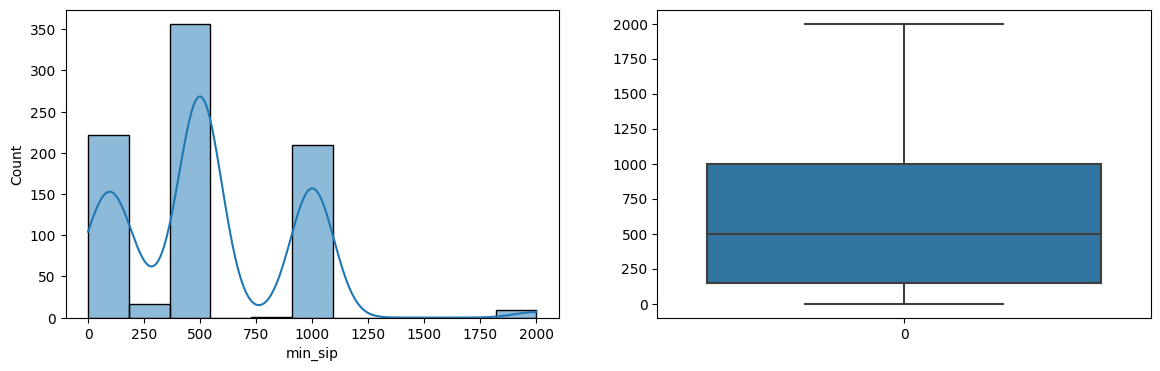

In [101]:
# distribution of min_sip
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14, 4))

sns.histplot(df['min_sip'],ax=ax[0],kde=True)
sns.boxplot(df['min_sip'],ax=ax[1])

Conclusion

Most of the funds have Minimum SIP amount as 0,500 and 1000

<Axes: >

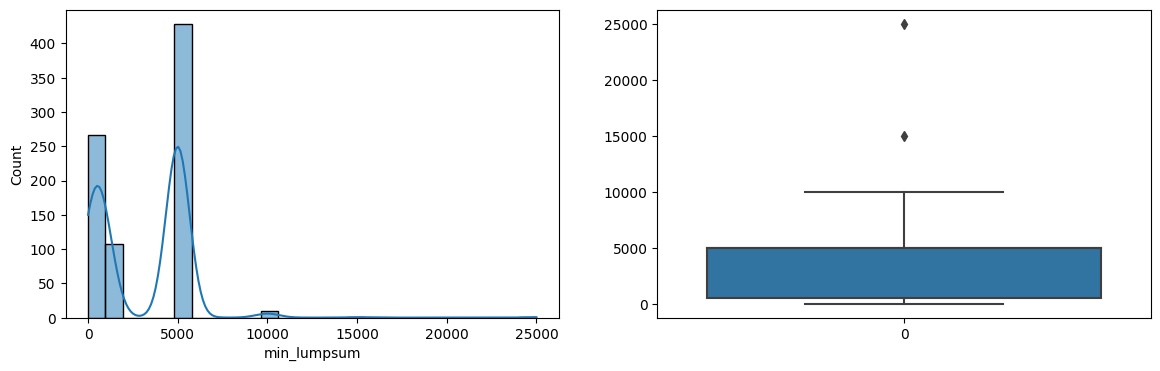

In [102]:
# distribution of min_lumpsum
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14, 4))

sns.histplot(df['min_lumpsum'],ax=ax[0],kde=True)
sns.boxplot(df['min_lumpsum'],ax=ax[1])

Conclusion

Most of the funds have Minimum Lumpsum amount between 0 to 5000

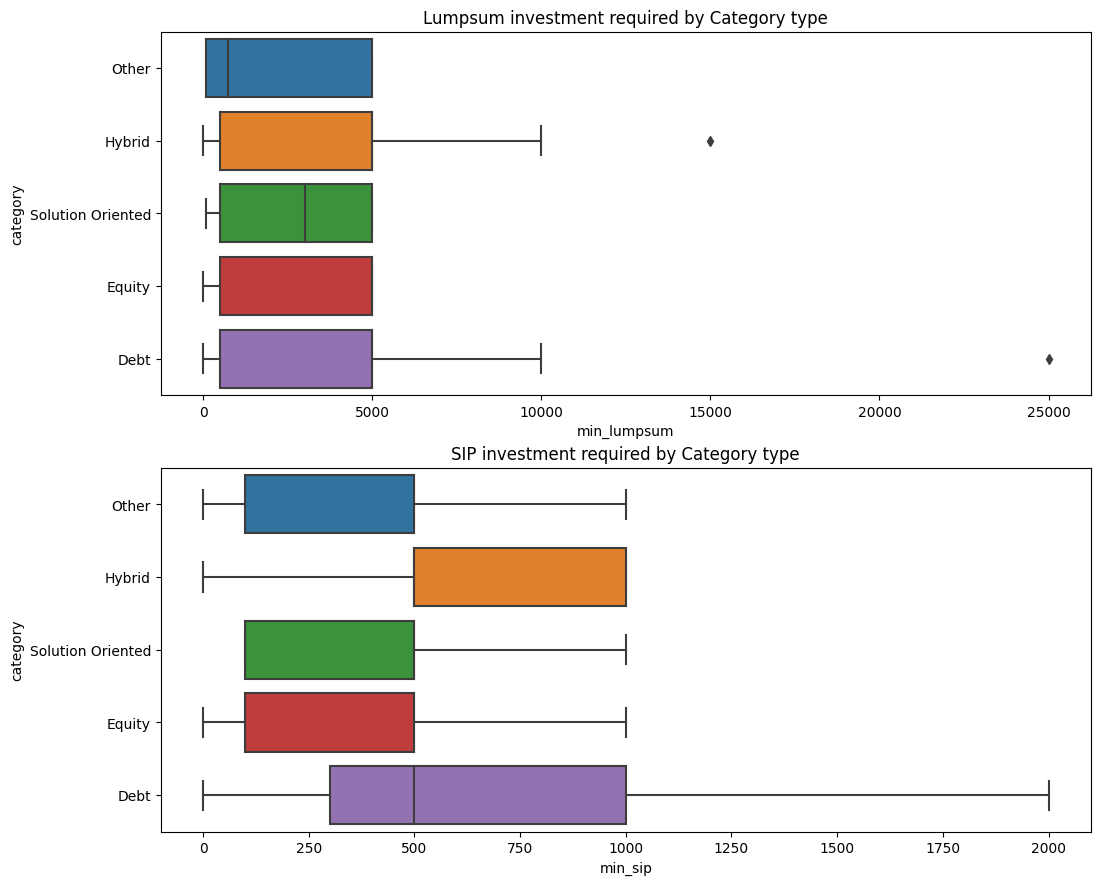

In [103]:
# distribution of min_sip and min_lumpsum by category type
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

sns.boxplot(data = df,y=df['category'],x=df['min_lumpsum'],ax=axes[0])
sns.boxplot(data = df,y=df['category'],x=df['min_sip'],ax=axes[1])

axes[0].set_title('Lumpsum investment required by Category type')
axes[1].set_title('SIP investment required by Category type')
plt.subplots_adjust(bottom=4,top=5)
plt.show()

Conclusion

Across fund type lumpum investment is almost the same.
Across fund type sip investment is high among Hybrid and Debt funds.

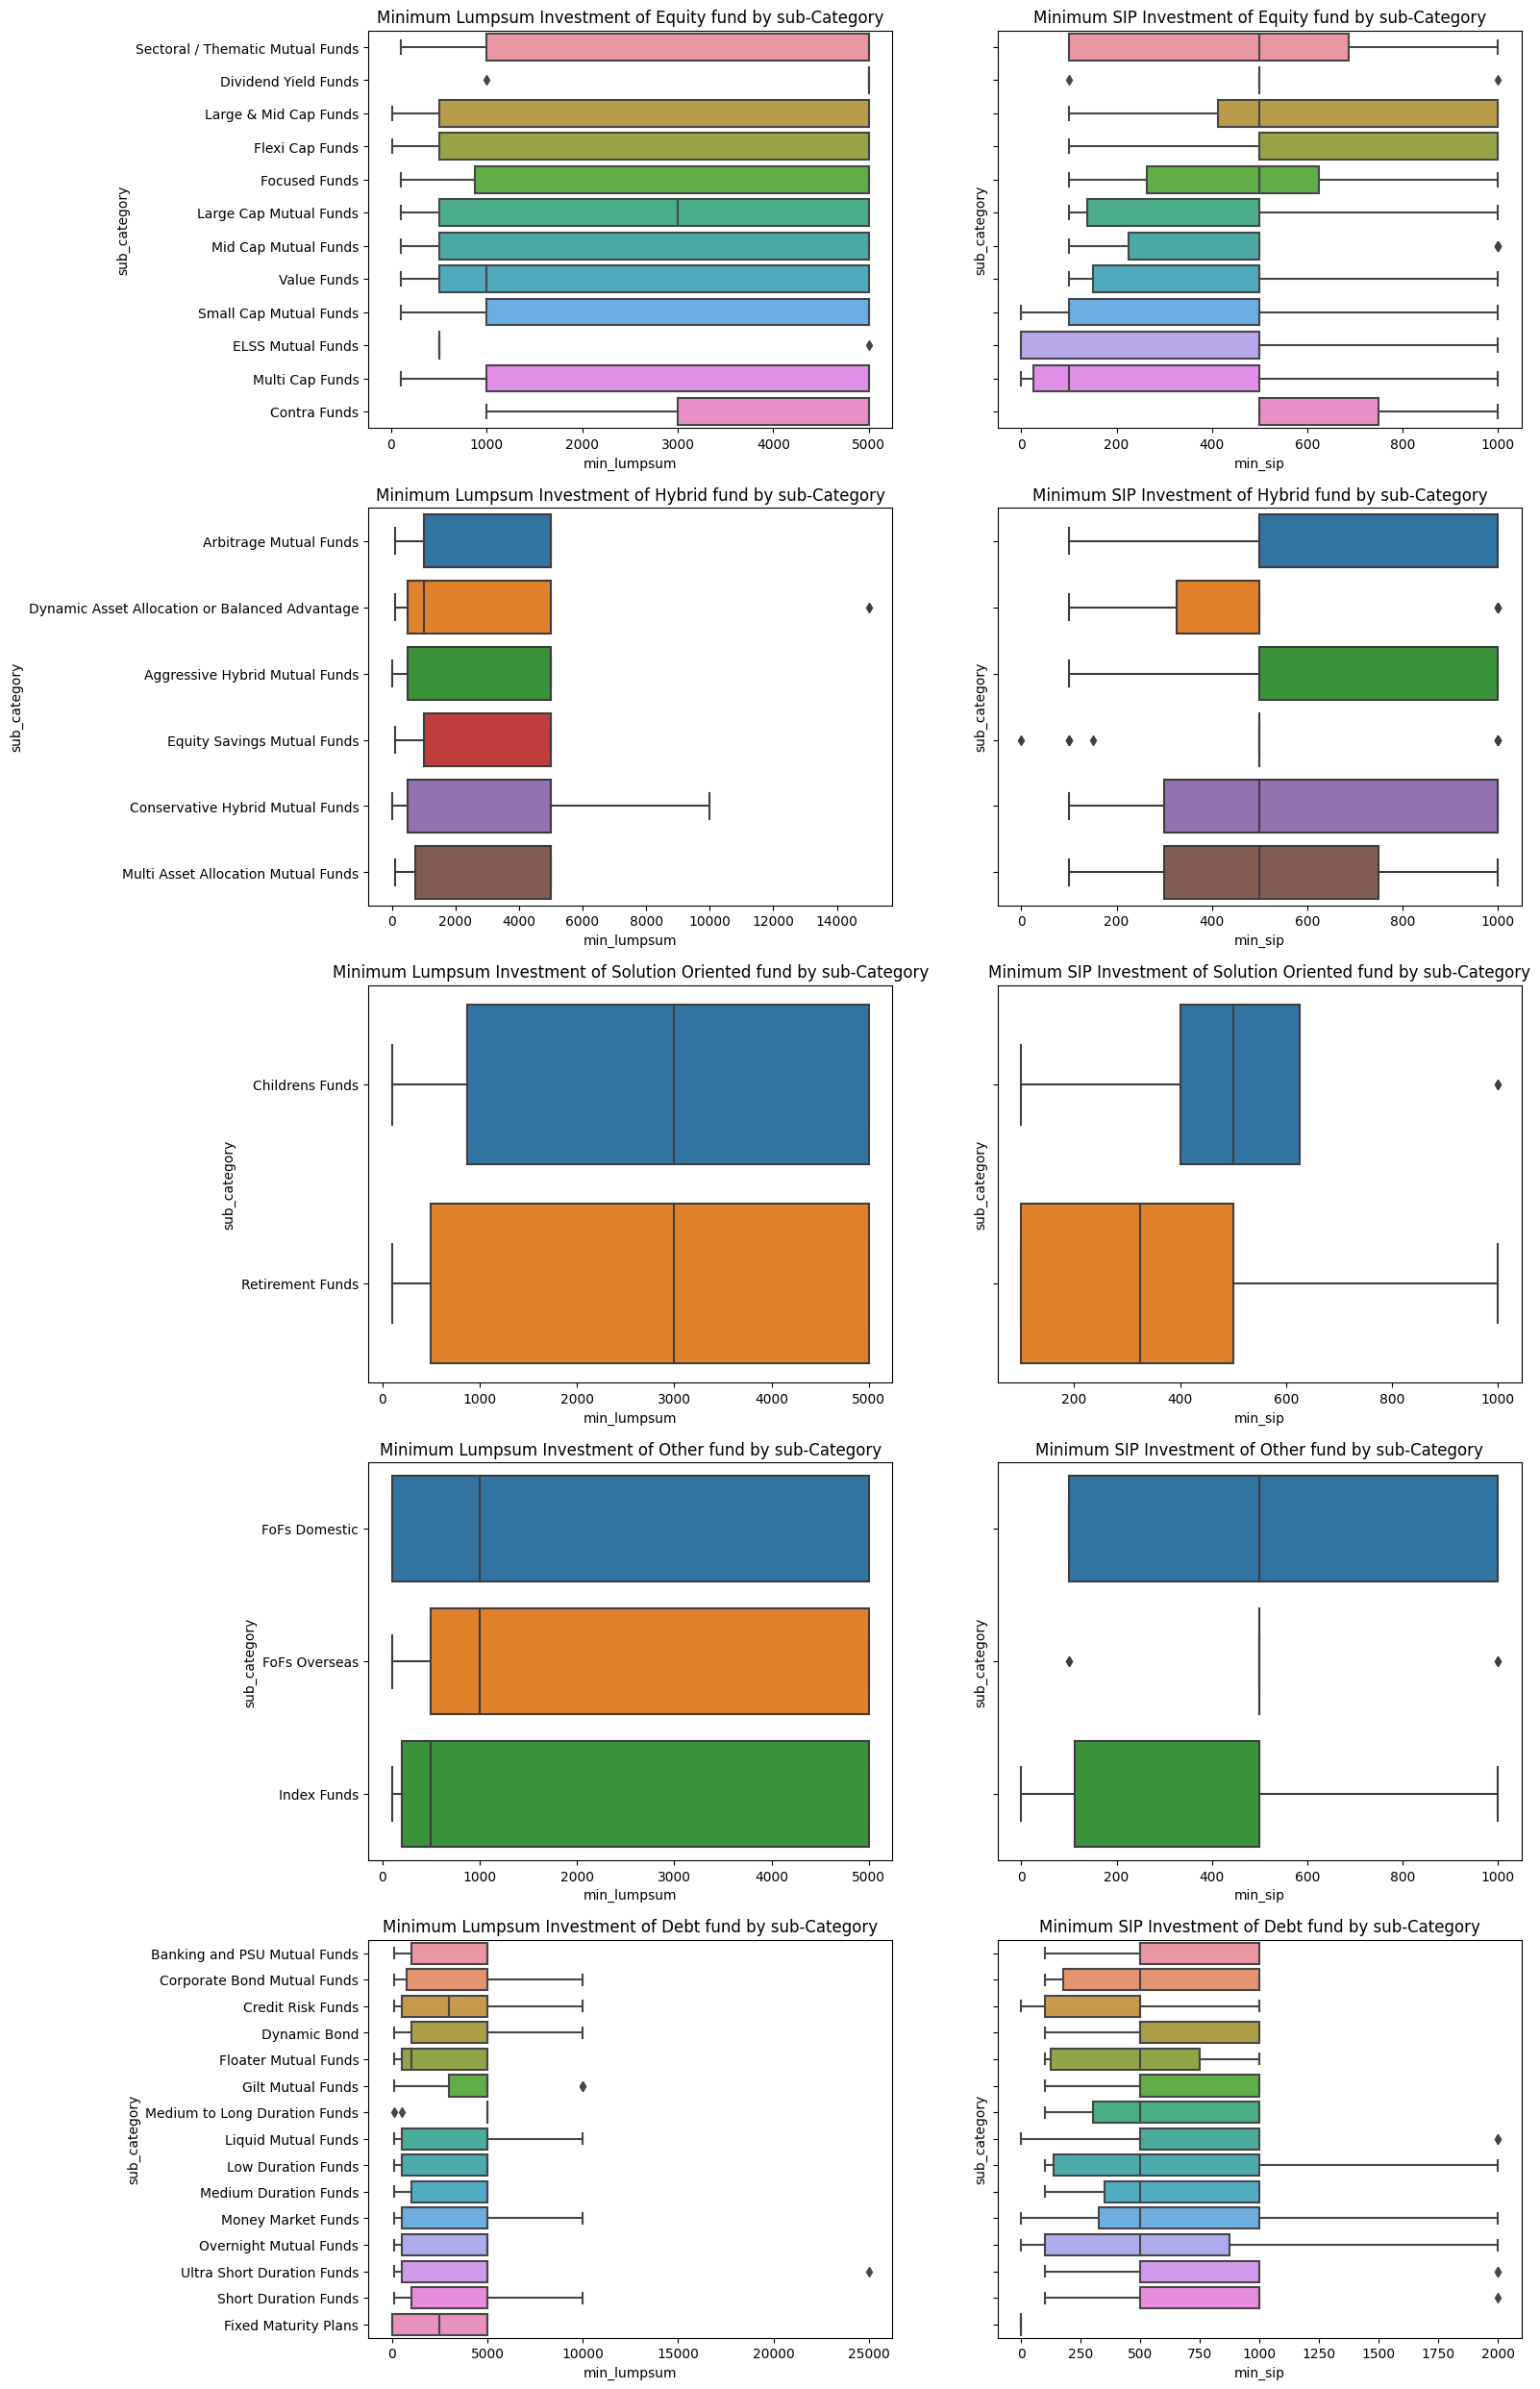

In [104]:
# distribution of min_sip,min_lumpsum by sub_category type

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 16),sharey='row')

sns.boxplot(equity_df,y='sub_category',x='min_lumpsum',ax=axes[0,0])
sns.boxplot(hybrid_df,y='sub_category',x='min_lumpsum',ax=axes[1,0])
sns.boxplot(solution_df,y='sub_category',x='min_lumpsum',ax=axes[2,0])
sns.boxplot(other_df,y='sub_category',x='min_lumpsum',ax=axes[3,0])
sns.boxplot(debt_df,y='sub_category',x='min_lumpsum',ax=axes[4,0])

axes[0,0].set_title('Minimum Lumpsum Investment of Equity fund by sub-Category')
axes[1,0].set_title('Minimum Lumpsum Investment of Hybrid fund by sub-Category')
axes[2,0].set_title('Minimum Lumpsum Investment of Solution Oriented fund by sub-Category')
axes[3,0].set_title('Minimum Lumpsum Investment of Other fund by sub-Category')
axes[4,0].set_title('Minimum Lumpsum Investment of Debt fund by sub-Category')


sns.boxplot(equity_df,y='sub_category',x='min_sip',ax=axes[0,1])
sns.boxplot(hybrid_df,y='sub_category',x='min_sip',ax=axes[1,1])
sns.boxplot(solution_df,y='sub_category',x='min_sip',ax=axes[2,1])
sns.boxplot(other_df,y='sub_category',x='min_sip',ax=axes[3,1])
sns.boxplot(debt_df,y='sub_category',x='min_sip',ax=axes[4,1])

axes[0,1].set_title('Minimum SIP Investment of Equity fund by sub-Category')
axes[1,1].set_title('Minimum SIP Investment of Hybrid fund by sub-Category')
axes[2,1].set_title('Minimum SIP Investment of Solution Oriented fund by sub-Category')
axes[3,1].set_title('Minimum SIP Investment of Other fund by sub-Category')
axes[4,1].set_title('Minimum SIP Investment of Debt fund by sub-Category')

plt.subplots_adjust(bottom=2.5,top=4,left=2,right=3)
plt.show()


## Analysis on expense ratio

The expense ratio measures how much of a fund's assets are used for administrative and other operating expenses.
A mutual fund expense ratio that is at or below its peer average is ideal

In [105]:
# create a function to make a category columns with above fund size

def fund_size_group(fund_size):
    if fund_size >= 0.0 and fund_size <= 500.0:
        return '0-500'
    elif fund_size > 500.0 and fund_size <= 750.0:
        return '500-750'
    elif fund_size > 750.0 and fund_size <= 2000.0:
        return '750-2000'
    elif fund_size > 2000.0 and fund_size <= 5000.0:
        return '2000-5000'
    elif fund_size > 5000.0 and fund_size <= 10000.0:
        return '5000-10000'
    elif fund_size > 10000.0 and fund_size <= 50000.0:
        return '10000-50000'
    else:
        return '>50000'

In [106]:
# create a column with above fund size group
df['fund_size_group'] = df['fund_size_cr'].apply(fund_size_group)

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


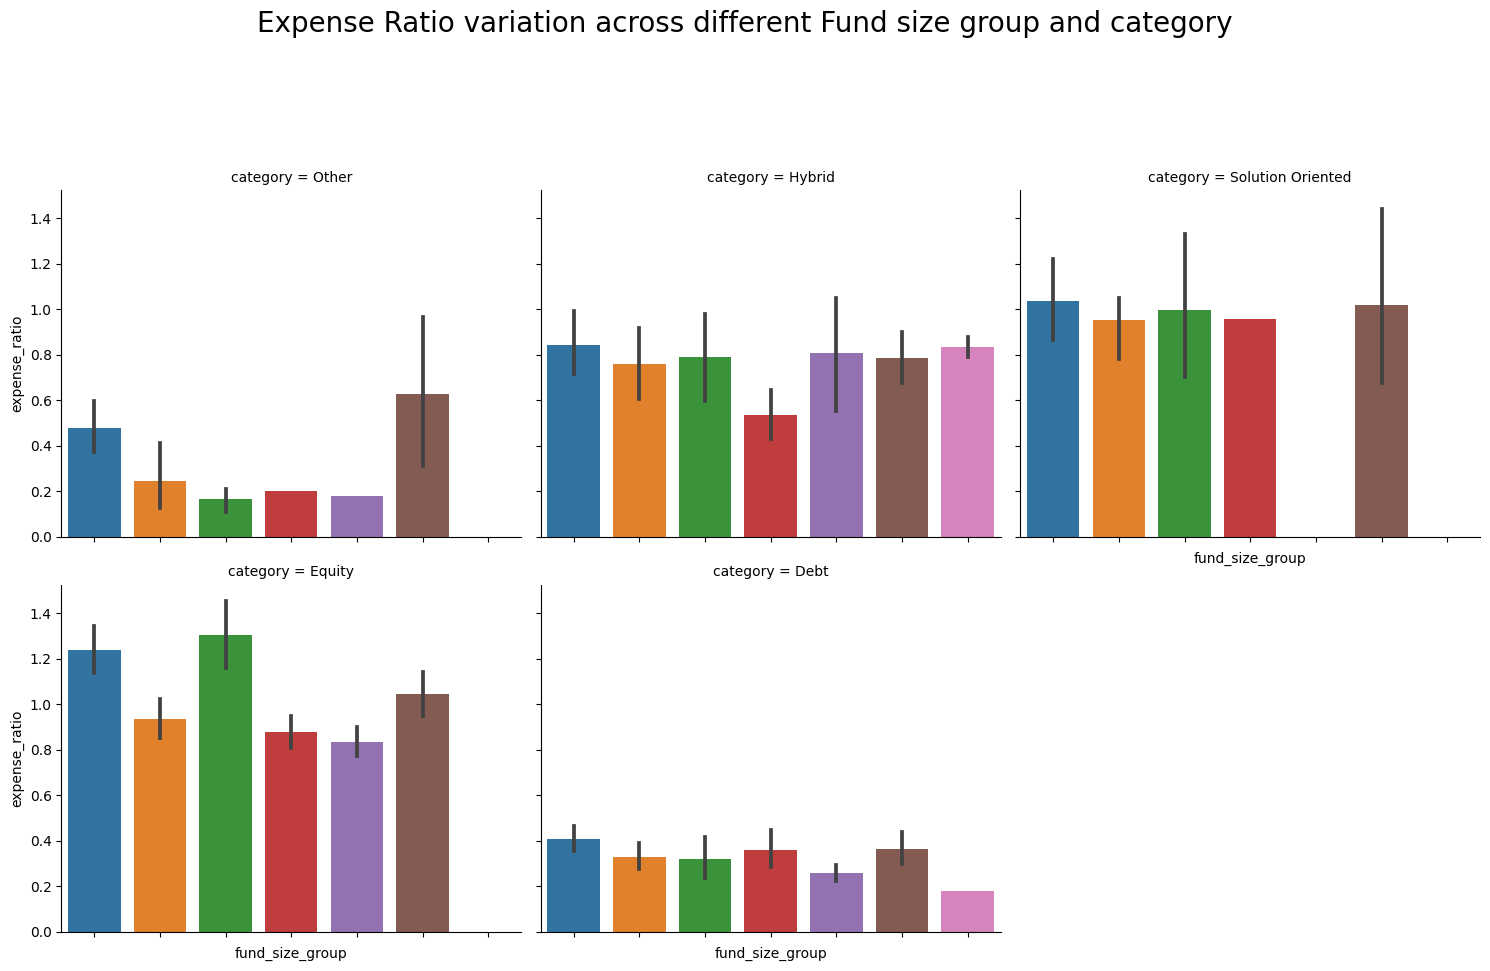

In [107]:
# expense ratio variation with fund size group across different category

# Create the categorical plot with subplots
g = sns.catplot(data=df, x='fund_size_group', y='expense_ratio', kind='bar', col='category', col_wrap=3)

# Set the rotation of the x-axis tick labels for all subplots
g.set_xticklabels(rotation='vertical')

# set the super title
plt.suptitle('Expense Ratio variation across different Fund size group and category',fontsize=20)
plt.subplots_adjust(top=0.8)

# Show the plot
plt.show()

Findings:

Large fund size does have low expense ratio.

Debt has the lowest 'expense ratio' amongs the funds.

<Axes: >

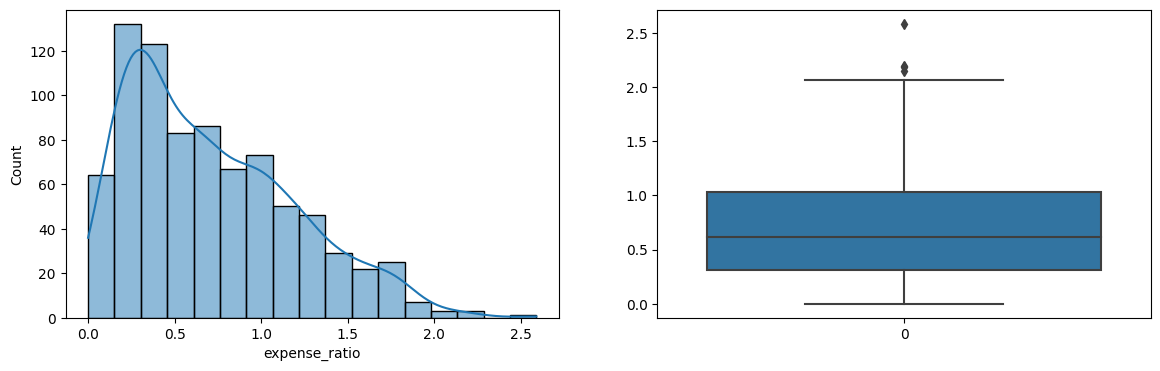

In [108]:
# expense ratio distribution
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14, 4))

sns.histplot(df['expense_ratio'],ax=ax[0],kde=True)
sns.boxplot(df['expense_ratio'],ax=ax[1])

Conclusion

Expense ratio of most of the schemes lies between 0 to 1

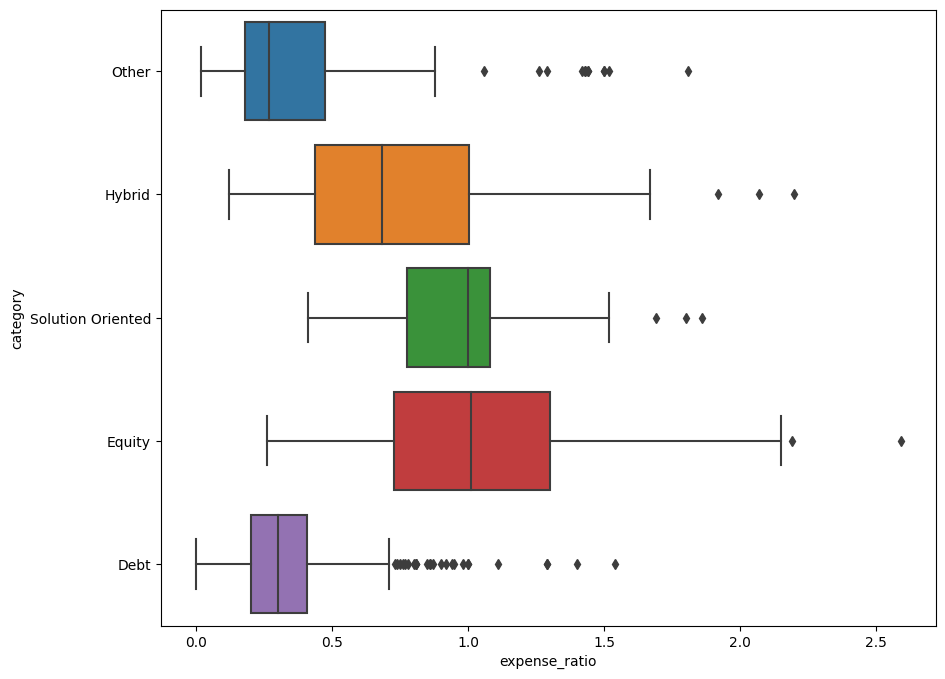

In [109]:
# distribution of expense ratio by category type
plt.figure(figsize=(10,8))
sns.boxplot(df,y=df['category'],x=df['expense_ratio'])
plt.show()

Conclusion

Equity and Solution oriented funds have the highest expense ratio among funds.

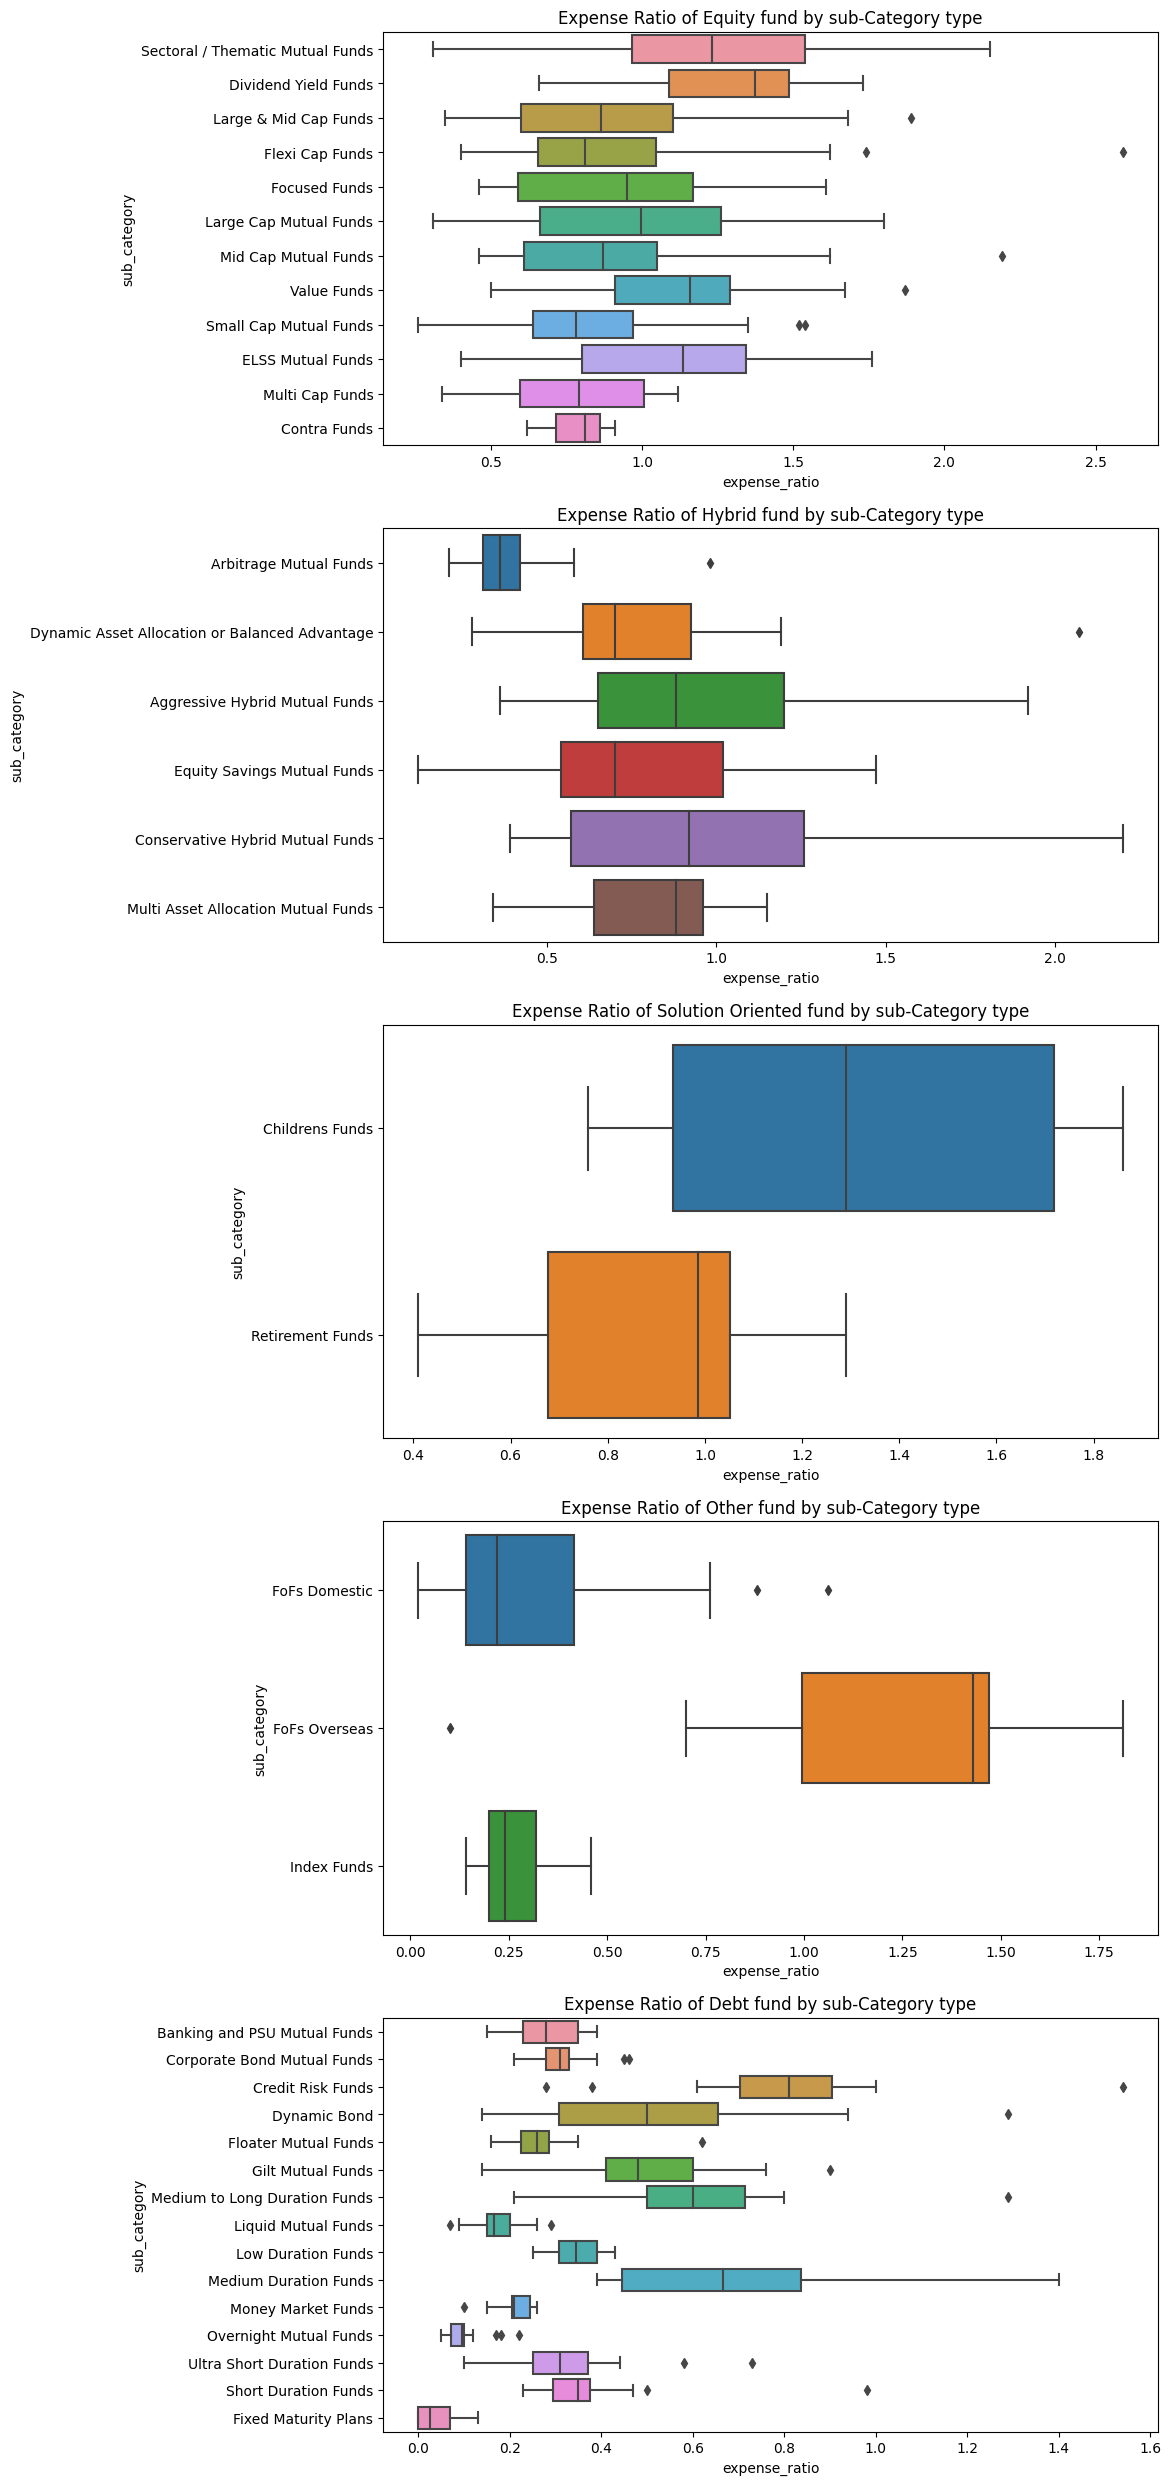

In [110]:
# distribution of expense ratio by sub-category type
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 16))

sns.boxplot(equity_df,y='sub_category',x='expense_ratio',ax=axes[0])
sns.boxplot(hybrid_df,y='sub_category',x='expense_ratio',ax=axes[1])
sns.boxplot(solution_df,y='sub_category',x='expense_ratio',ax=axes[2])
sns.boxplot(other_df,y='sub_category',x='expense_ratio',ax=axes[3])
sns.boxplot(debt_df,y='sub_category',x='expense_ratio',ax=axes[4])

axes[0].set_title('Expense Ratio of Equity fund by sub-Category type')
axes[1].set_title('Expense Ratio of Hybrid fund by sub-Category type')
axes[2].set_title('Expense Ratio of Solution Oriented fund by sub-Category type')
axes[3].set_title('Expense Ratio of Other fund by sub-Category type')
axes[4].set_title('Expense Ratio of Debt fund by sub-Category type')

plt.subplots_adjust(bottom=2.5,top=4)
plt.show()

Conclusion

Equity type -
Among equity type Sectoral and Dividend Yield funds have the highest expense ratio.

Hybrid type-
Among hybrid type Arbitrage Funds have the Lowest expense ratio.

Solution Oriented -
Chilren Funds have the highest expense ratio.

Other Fund-
FOFs Overseas has the highest expense Ratio.

Debt Fund-
Among debt fund Credit Risk Funds has the highest expense ratio.

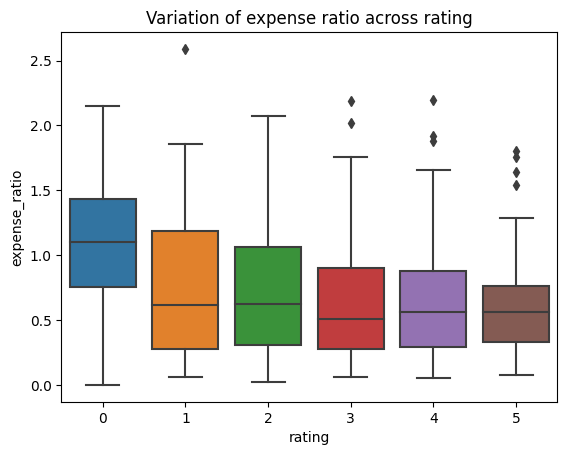

In [111]:
# expense ratio vs rating

sns.boxplot(df,x='rating',y='expense_ratio')
plt.title('Variation of expense ratio across rating')
plt.show()

Findings -

For higher rating funds, expense ratio is less.

We will check category distribution with rating to learn more.

In [112]:
# Lets find why 0 rating fund has high expense ratio
pd.crosstab(df['rating'],df['category'],margins=True)

category  Debt  Equity  Hybrid  Other  Solution Oriented  All
rating                                                       
0            4      78       2     19                  5  108
1           22      18      10      4                  4   58
2           66      54      25     14                  9  168
3           96      76      39     27                  5  243
4           64      52      27     12                  3  158
5           30      30      13      4                  2   79
All        282     308     116     80                 28  814

Findings

Clearly 0 rating fund has more equity category=72% and equity fund has high expense ratio.

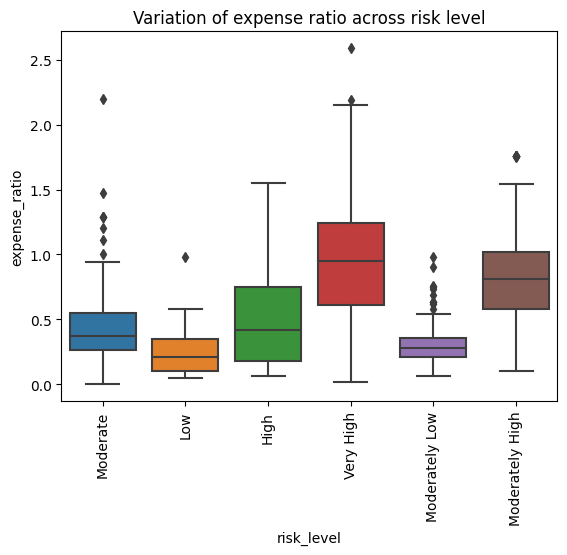

In [113]:
# expense ratio vs risk level

sns.boxplot(df,x='risk_level',y='expense_ratio')
plt.title('Variation of expense ratio across risk level')
plt.xticks(rotation='vertical')
plt.show()

Conclusion

Expense ratio is high for very high risk. We can check which category mostly falls in high risk as it has to be Equity.

In [114]:
# Lets find why very high risk fund has high expense ratio
pd.crosstab(df['risk_level'],df['category'],margins=True)

category         Debt  Equity  Hybrid  Other  Solution Oriented  All
risk_level                                                          
High                3       0       7     15                  2   27
Low                32       0      21      0                  0   53
Moderate          109       0       9      4                  2  124
Moderately High    16       8      29      6                  6   65
Moderately Low    121       1       4      1                  0  127
Very High           1     299      46     54                 18  418
All               282     308     116     80                 28  814

Findings

Most of the Very high risk funds are from Equity and equity fund has high expense ratio.

## Analysis on risk level

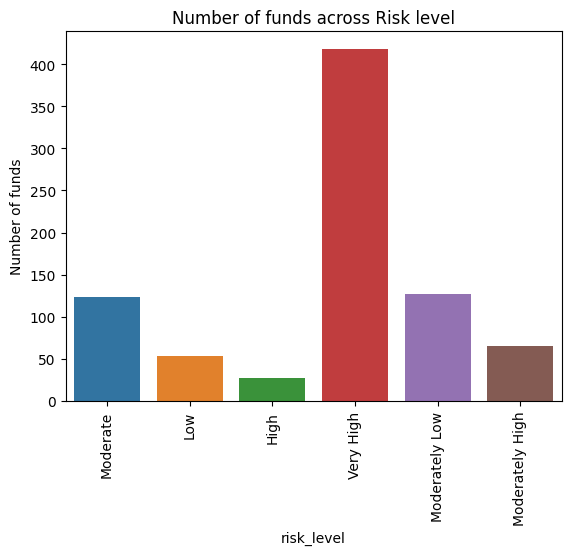

In [115]:
# total no of schemes in each risk level
sns.countplot(df,x='risk_level')
plt.title('Number of funds across Risk level')
plt.ylabel('Number of funds')
plt.xticks(rotation='vertical')
plt.show()

Conclusion

Most of the schemes have risk level Very High

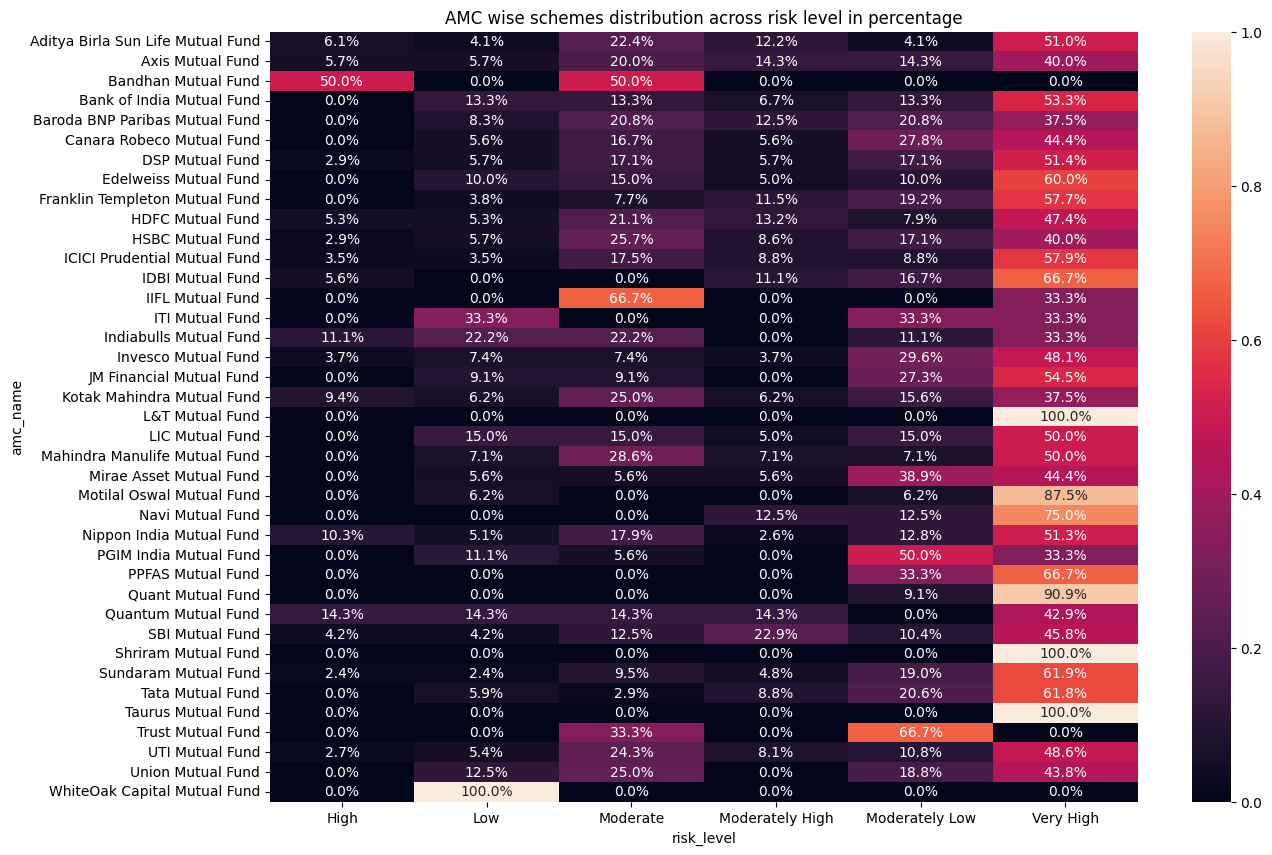

In [116]:
# amc and risk level
plt.figure(figsize=(14,10))
sns.heatmap(pd.crosstab(df['amc_name'],df['risk_level'],normalize='index'),annot=True,fmt='.1%')
plt.title('AMC wise schemes distribution across risk level in percentage')
plt.show()

Conclusion

Most of the AMCs have schemes with risk level 6(Very High).

Taurus, Shriram and L&T have 100% in Very High Risk category.

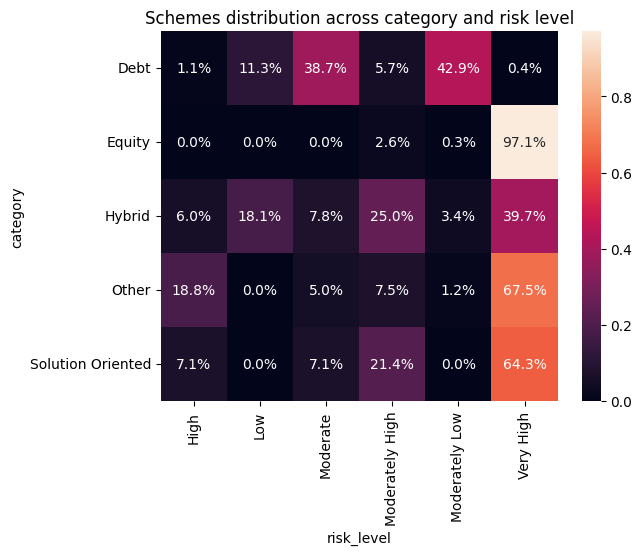

In [117]:
# category and risk level
sns.heatmap(pd.crosstab(df['category'],df['risk_level'],normalize='index'),annot=True,fmt='.1%')
plt.title('Schemes distribution across category and risk level')
plt.show()

Findings

Low, Moderate and Moderately Low are dominated by Debt Funds

Moderately High, High and very High are dominated by Equity Funds

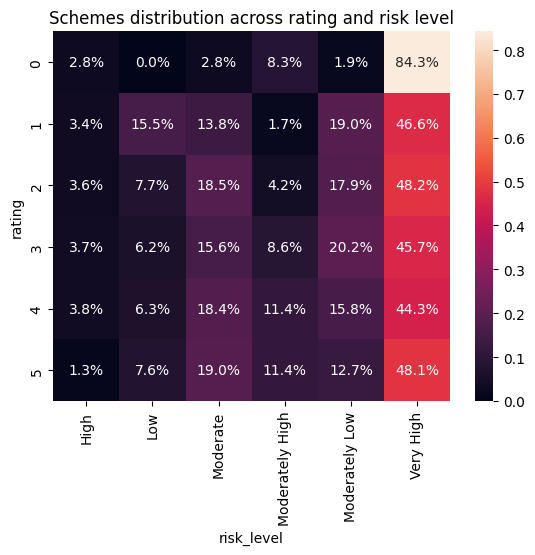

In [118]:
# rating and risk level
sns.heatmap(pd.crosstab(df['rating'],df['risk_level'],normalize='index'),annot=True,fmt='.1%')
plt.title('Schemes distribution across rating and risk level')
plt.show()

Findings -

0 rating funds have major concentration of Very High risk funds.

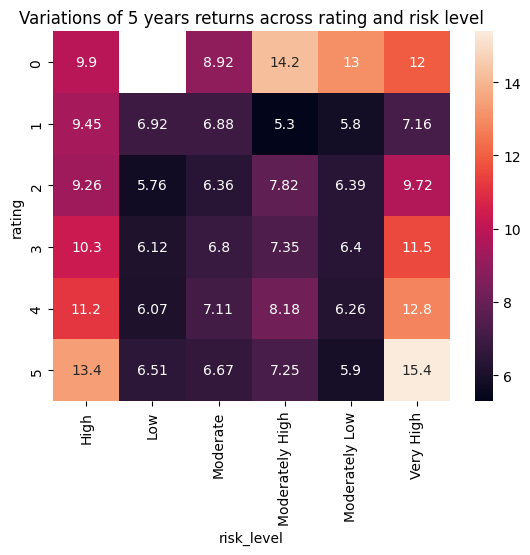

In [119]:
sns.heatmap(pd.pivot_table(data=df,index='rating',columns='risk_level',values='returns_5yr'),annot=True,fmt='.3g')
plt.title('Variations of 5 years returns across rating and risk level')
plt.show()

Findings -

0 rating funds has high return as in the above cell you can see most 0 rated funds are in equity.

For risk level 5 and 6 as high rated fund should be chosen as returns are 13.4% and 15.4% respectively.

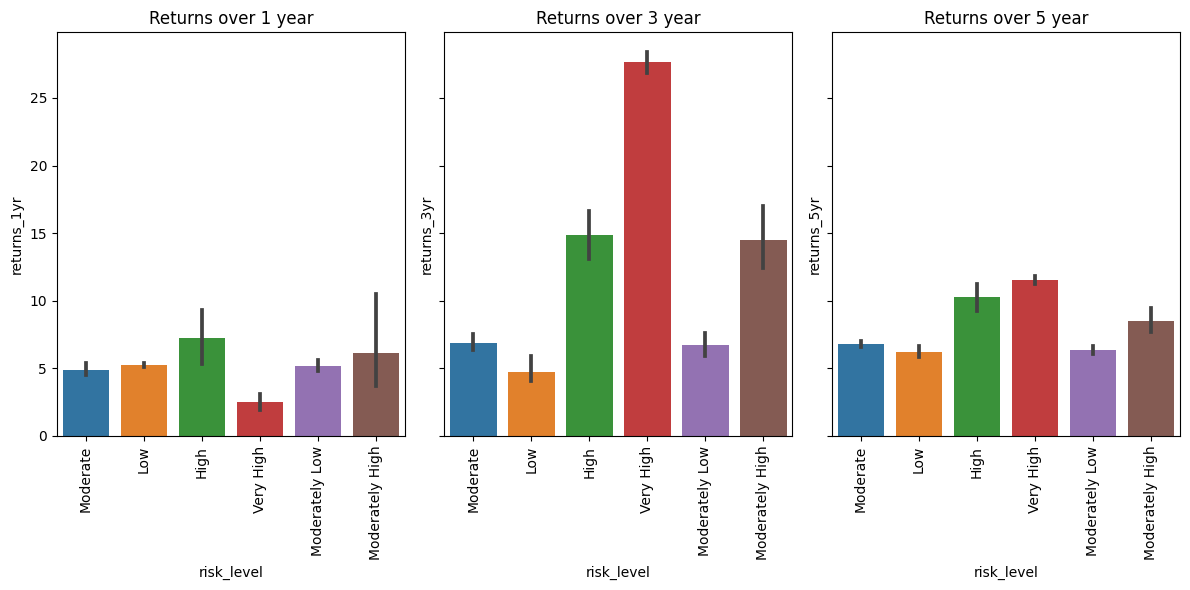

In [120]:
# high risk level means high returns ??

# Create figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6),sharey='row')

# Create a bar plot for each axis
sns.barplot(df,x='risk_level',y='returns_1yr',ax=axes[0])
sns.barplot(df,x='risk_level',y='returns_3yr',ax=axes[1])
sns.barplot(df,x='risk_level',y='returns_5yr',ax=axes[2])

# Set the title for each axis
axes[0].set_title('Returns over 1 year')
axes[0].set_xticklabels(rotation='vertical',labels=df['risk_level'].unique())
axes[1].set_title('Returns over 3 year')
axes[1].set_xticklabels(rotation='vertical',labels=df['risk_level'].unique())
axes[2].set_title('Returns over 5 year')
axes[2].set_xticklabels(rotation='vertical',labels=df['risk_level'].unique())

plt.tight_layout()
plt.show()

Findings -

In 3 and 5 years returns have a positive relation with risk level.

It clearly shows that high risk funds should be held for longer time to get more returns.

## Analysis on AMC

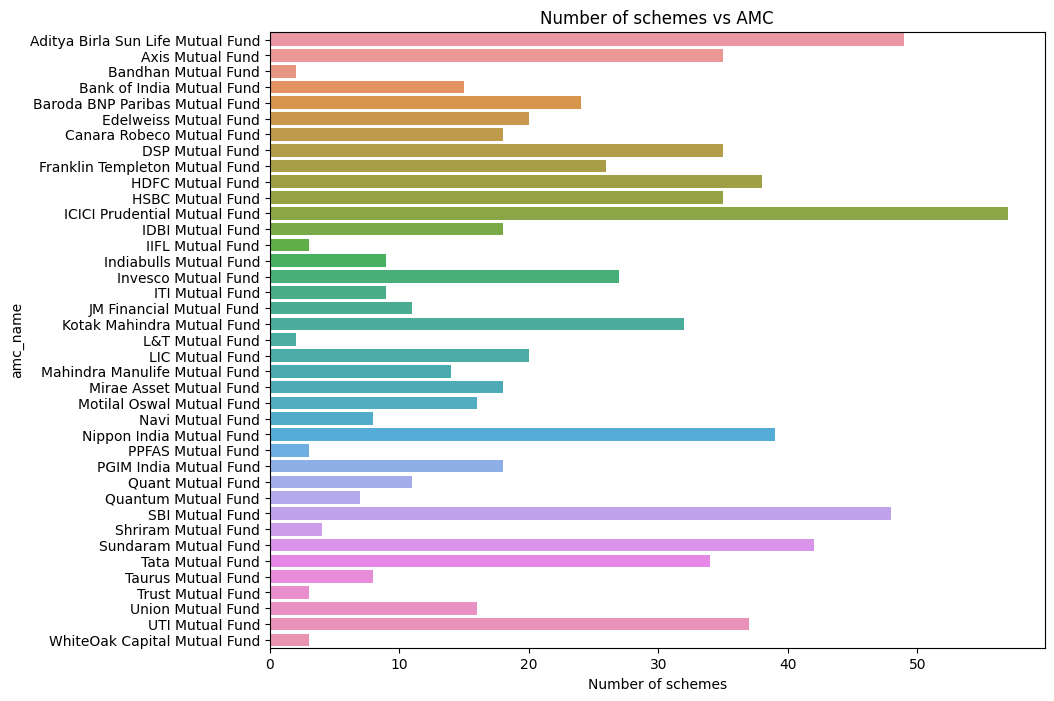

In [121]:
plt.figure(figsize=(10,8))
sns.countplot(df,y='amc_name')
plt.title('Number of schemes vs AMC')
plt.xlabel('Number of schemes')
plt.show()

Findings- ICICI has around 57 schemes running

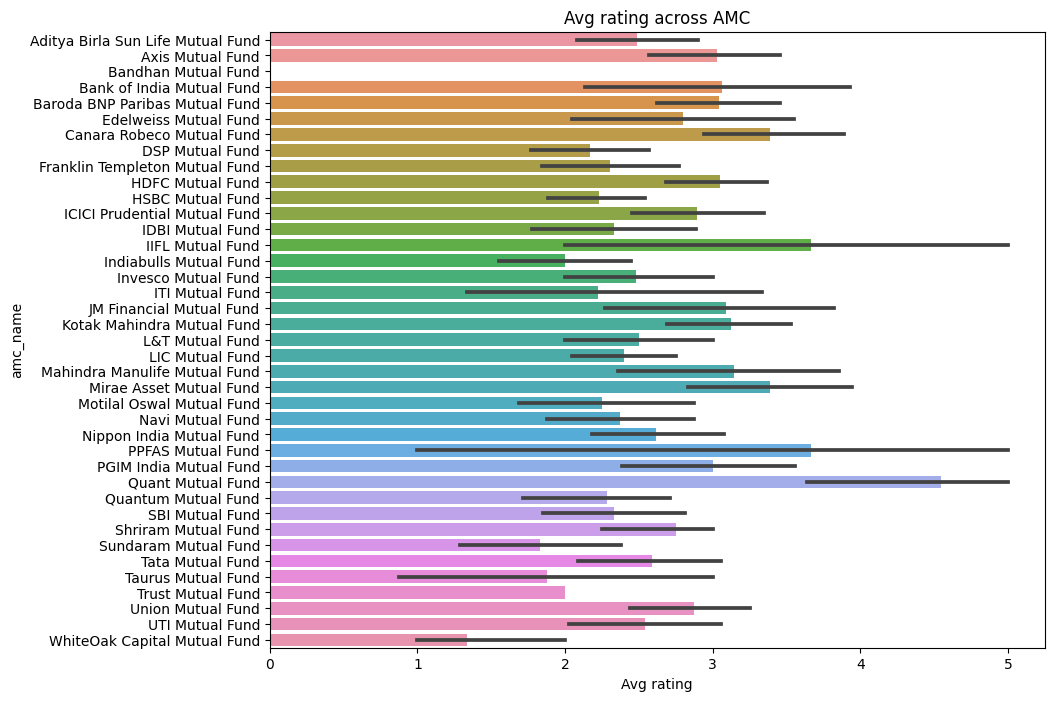

In [122]:
# avg rating of amc funds
plt.figure(figsize=(10,8))
sns.barplot(df,y='amc_name',x='rating')
plt.title('Avg rating across AMC')
plt.xlabel('Avg rating')
plt.show()

Findings - Quant Mutual Funds have the highest rating.

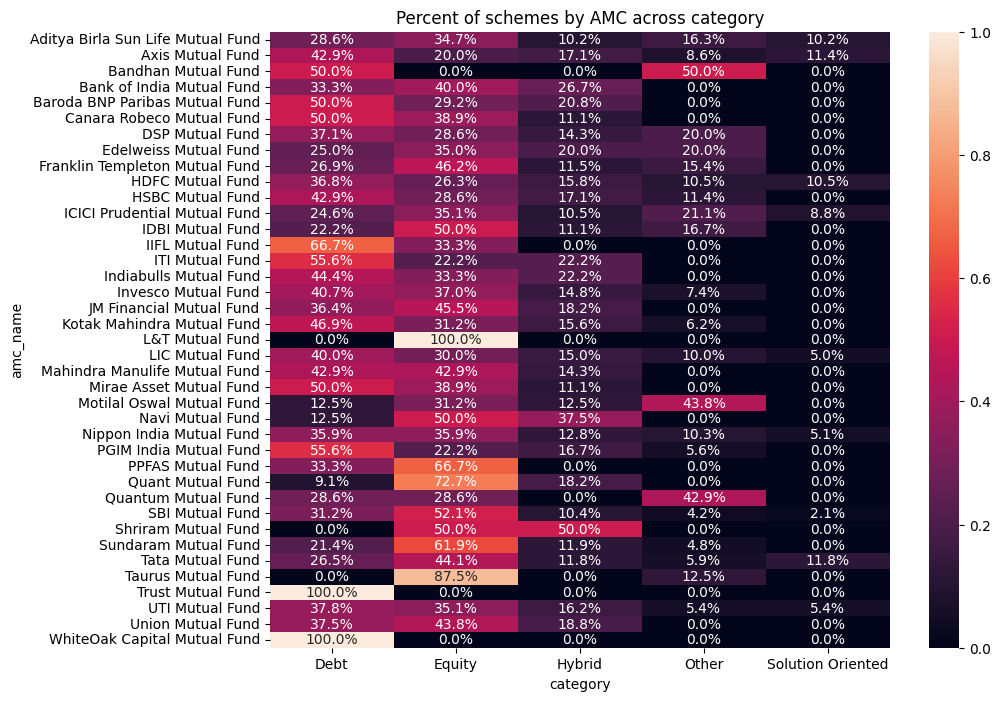

In [123]:
# amc name vs category
plt.figure(figsize=(10,8))
sns.heatmap(pd.crosstab(df['amc_name'],df['category'],normalize='index'),annot=True,fmt='.1%')
plt.title('Percent of schemes by AMC across category')
plt.show()

Findings -

Most of the AMC have funds in Debt and Equity category.

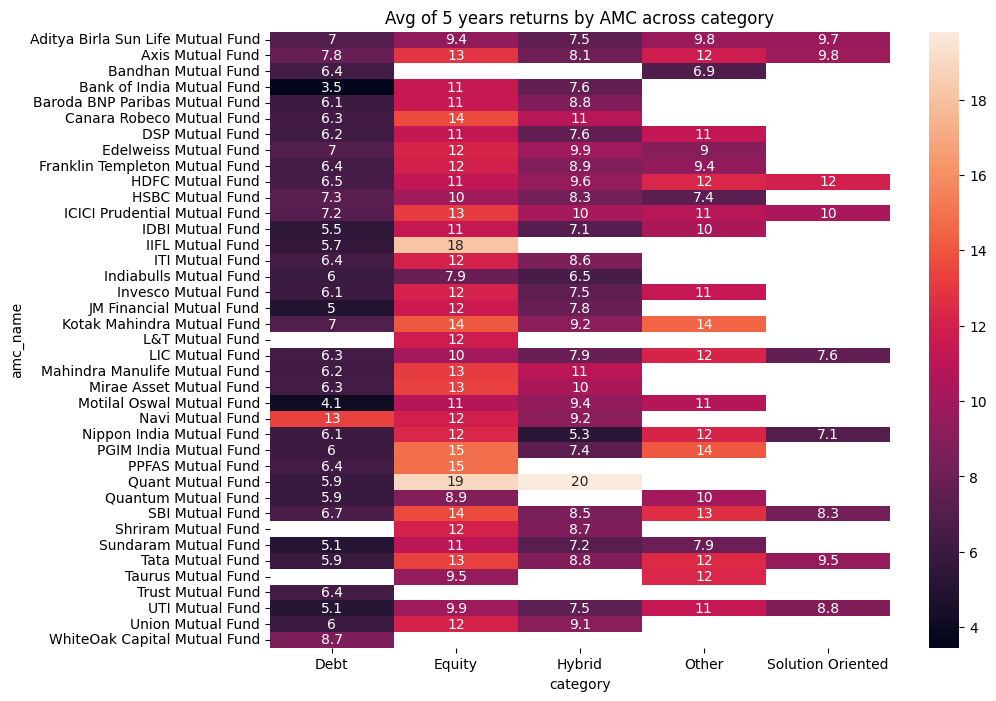

In [124]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.pivot_table(df,index='amc_name',columns='category',values='returns_5yr'),annot=True,fmt='.2g')
plt.title('Avg of 5 years returns by AMC across category')
plt.show()

Findings-

Highest return of 13% in debt category is given by Navi Mutual Fund. (Though there was 1 debt fund by Navi)

Highest return of 19% in Equity category is given by Quant Mutual Fund.

Highest Return of 20% in Hybrid category is given by Quant Mutual Fund.

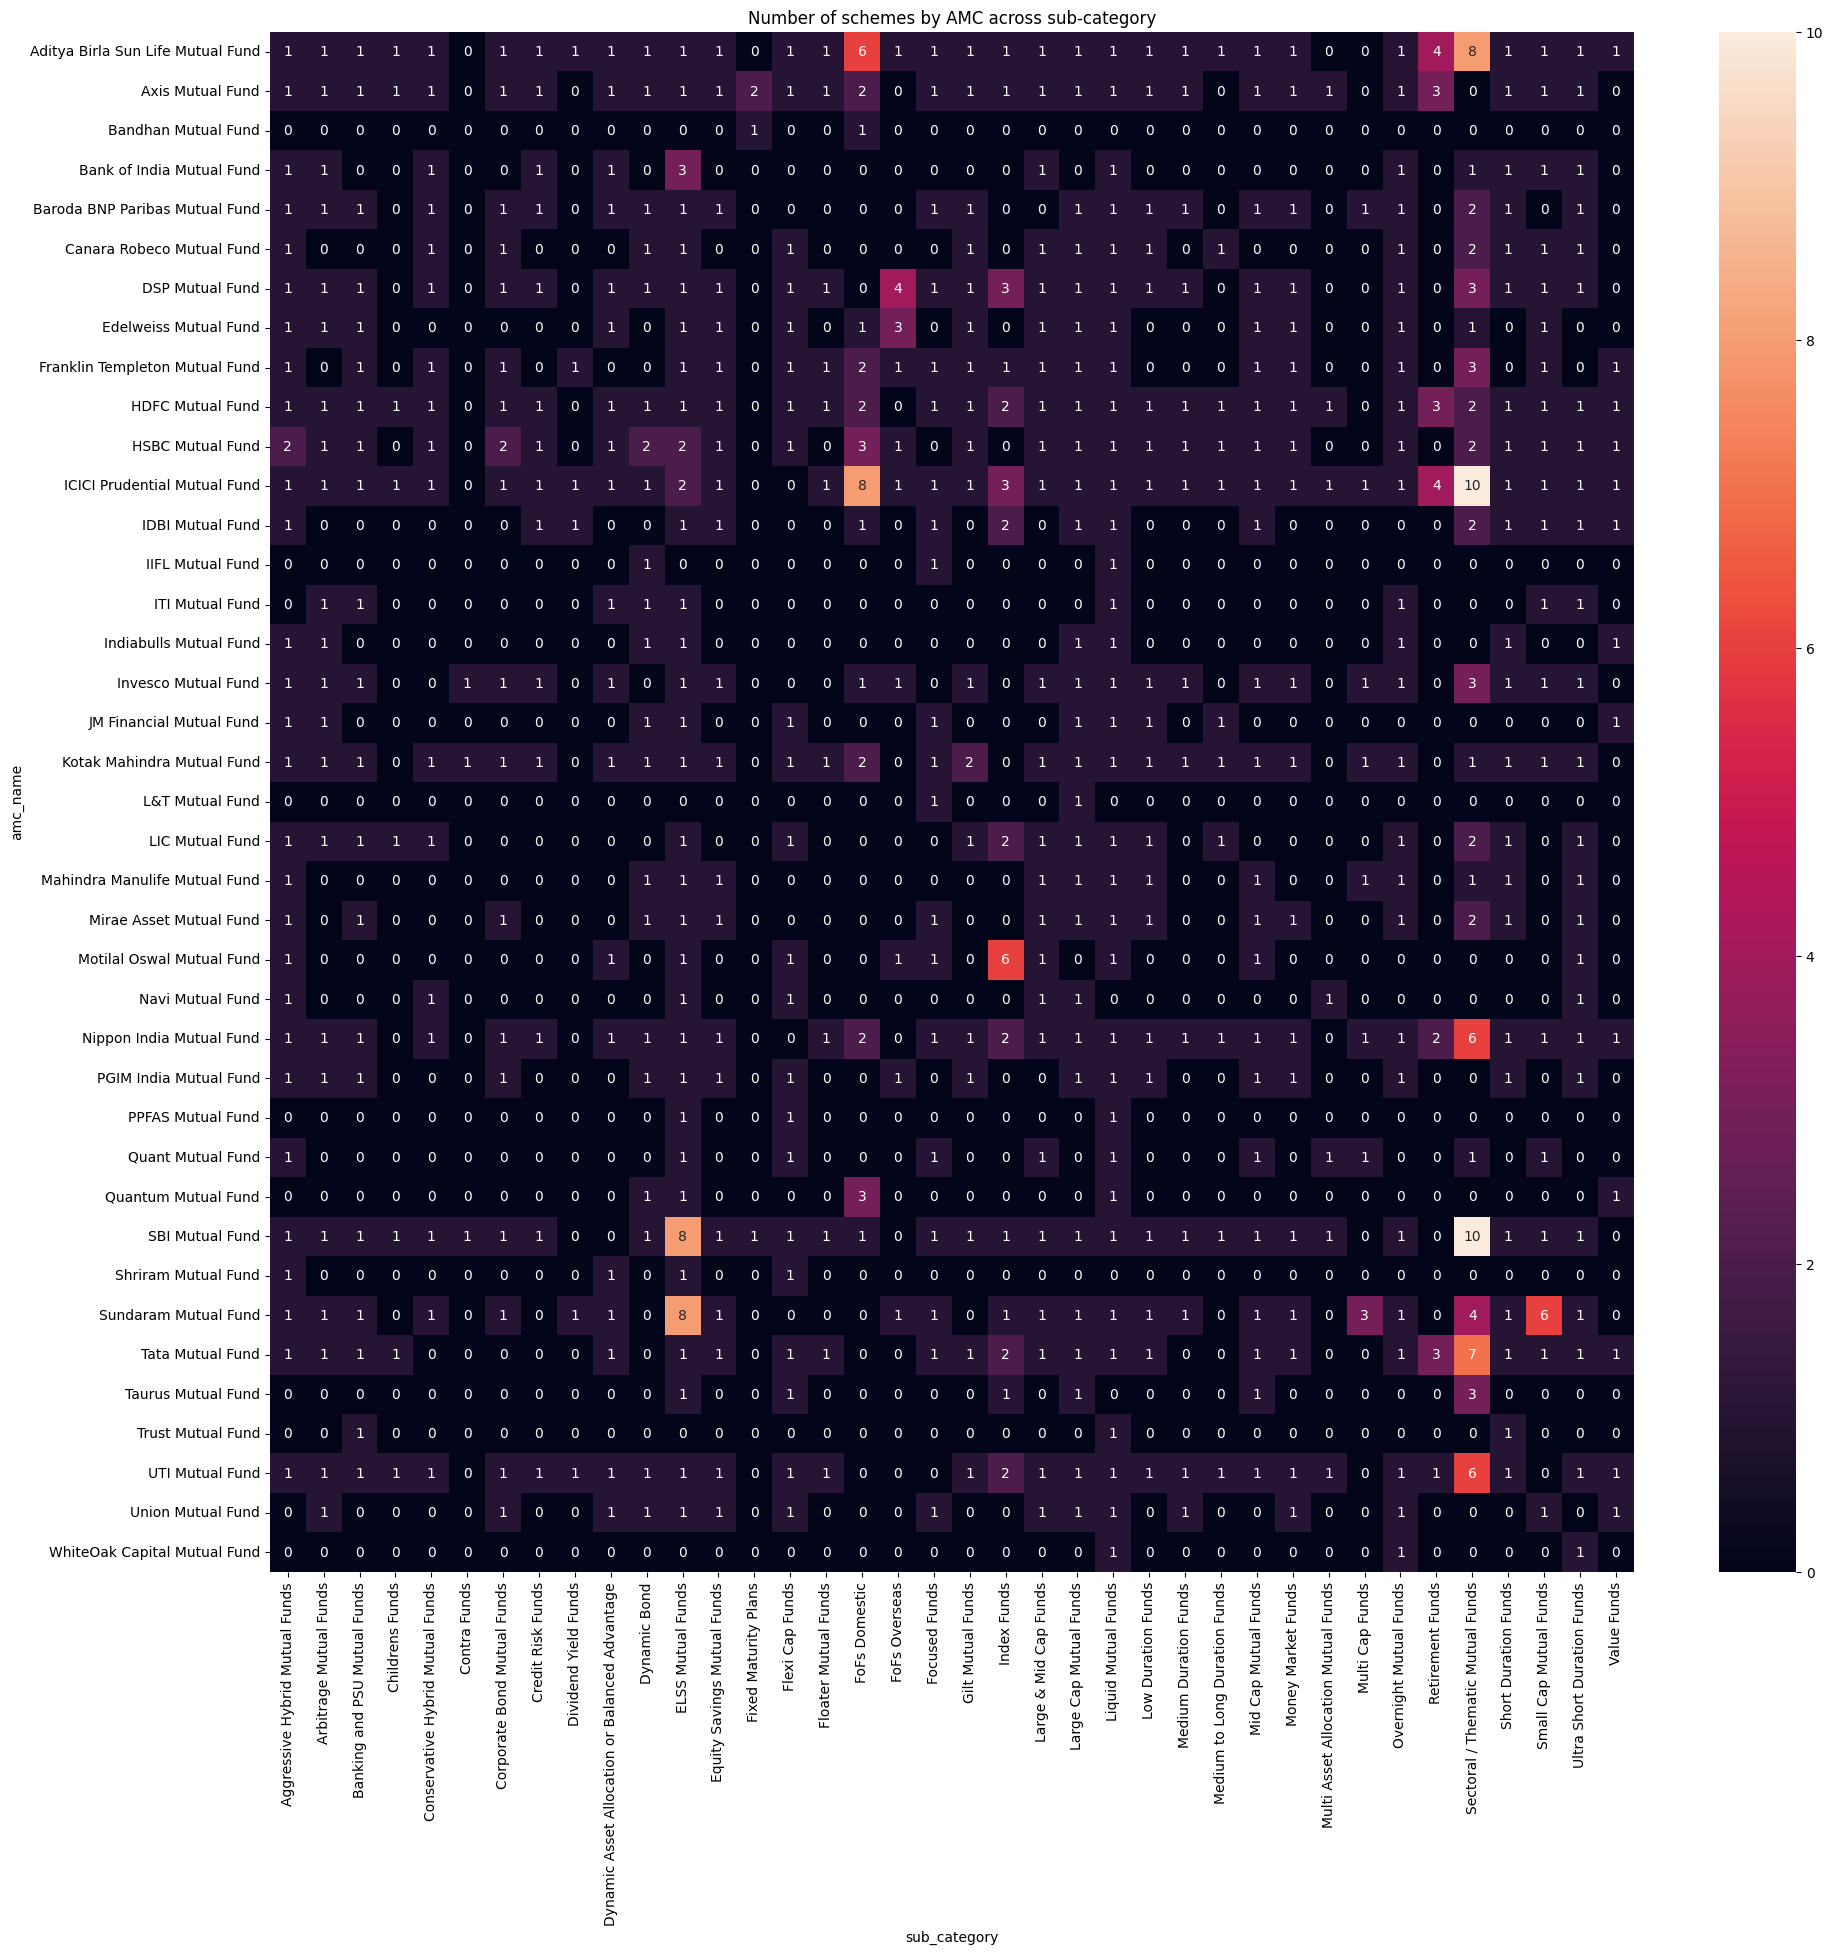

In [125]:
# amc name vs sub-category
plt.figure(figsize=(22,20))
sns.heatmap(pd.crosstab(df['amc_name'],df['sub_category']),annot=True)
plt.title('Number of schemes by AMC across sub-category')
plt.show()

Findings

Most of schemes are opened in Sectoral/Thematic sub category.

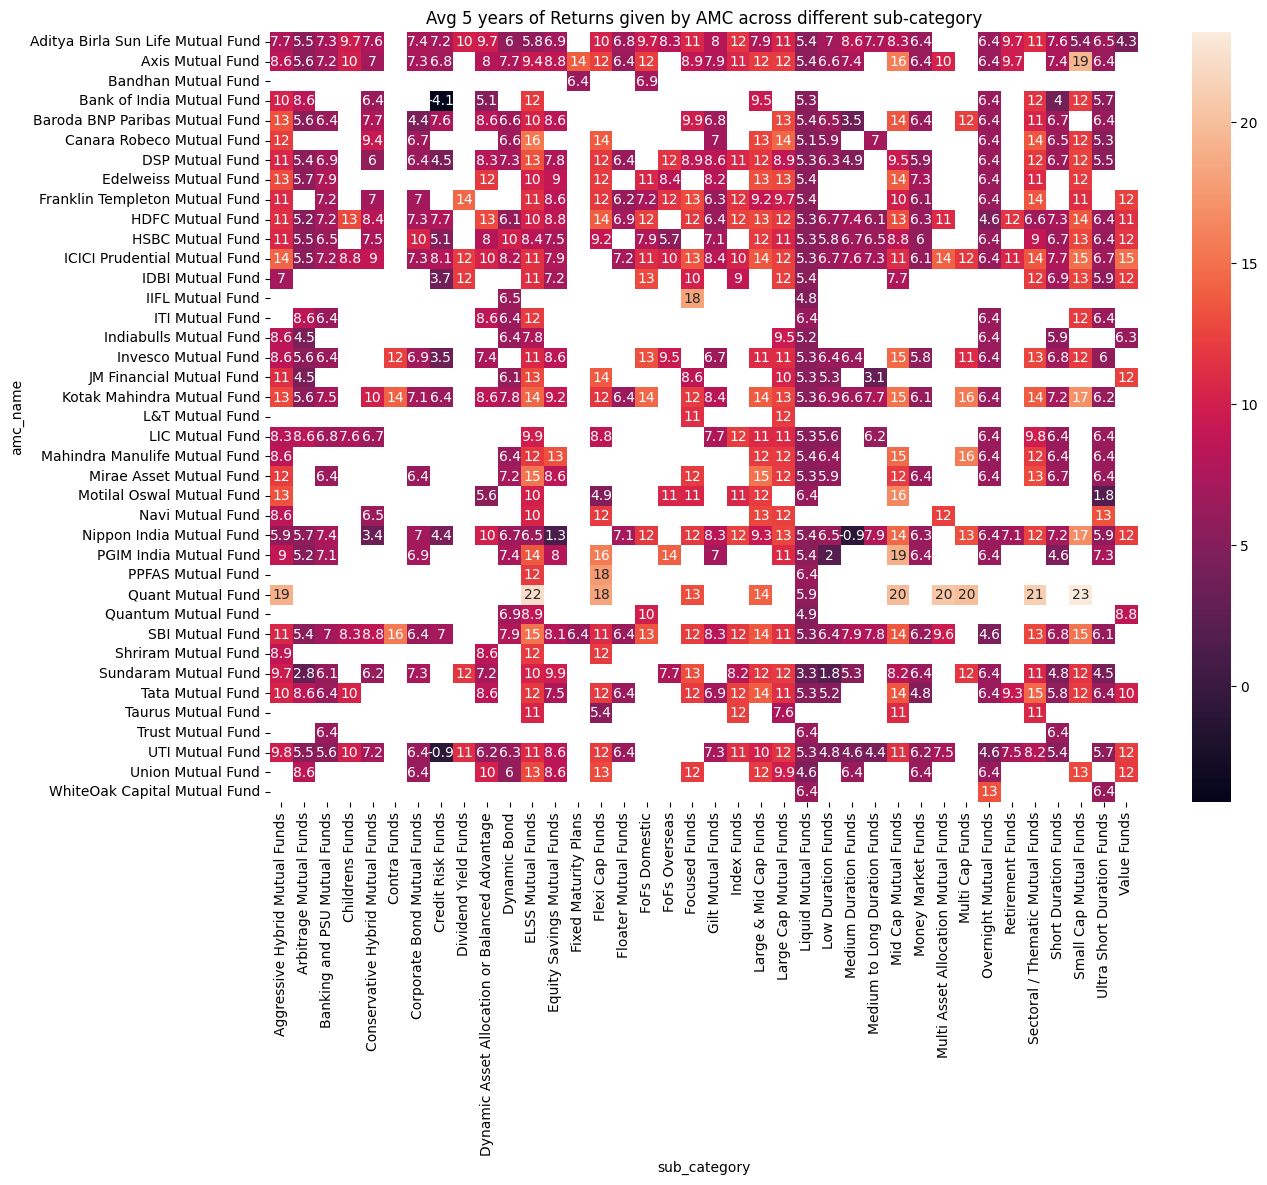

In [126]:
plt.figure(figsize=(14,10))
sns.heatmap(pd.pivot_table(df,index='amc_name',columns='sub_category',values='returns_5yr'),annot=True,fmt='.2g')
plt.title('Avg 5 years of Returns given by AMC across different sub-category')
plt.show()

Findings - Quant Mutual Funds have performed very well across different Sub categories.

## Analysis of Rating

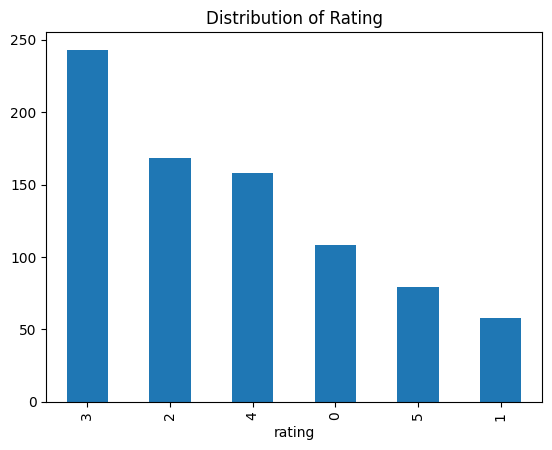

In [127]:
df['rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Rating')
plt.show()

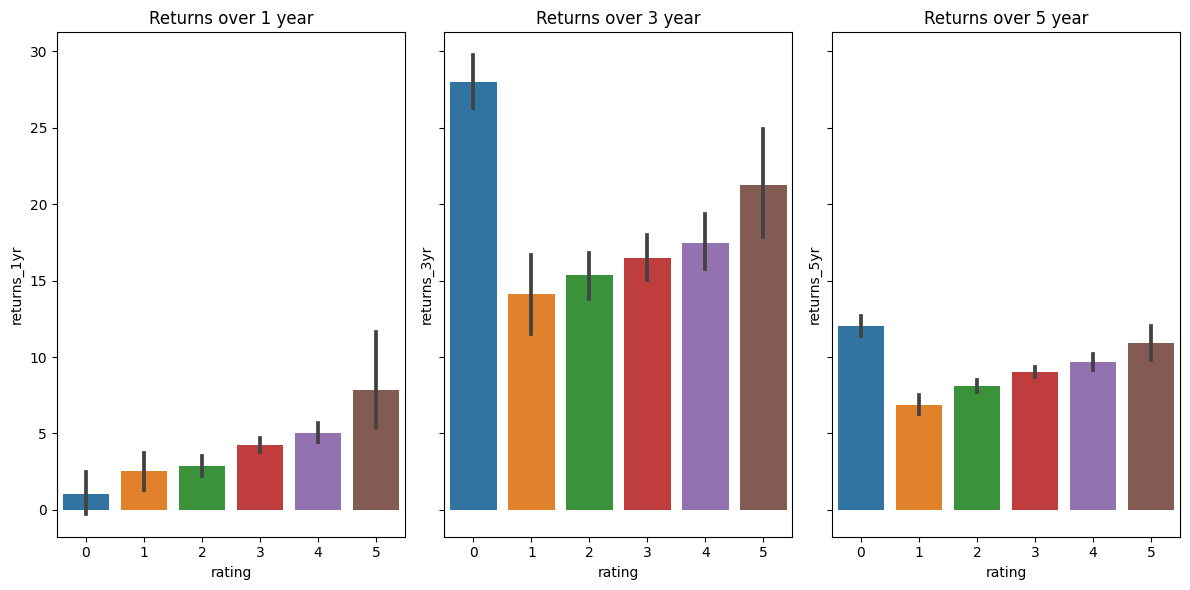

In [128]:
# does returns vary because of ratings ??

# Create figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6),sharey='row')

# Create a bar plot for each axis
sns.barplot(df,x='rating',y='returns_1yr',ax=axes[0])
sns.barplot(df,x='rating',y='returns_3yr',ax=axes[1])
sns.barplot(df,x='rating',y='returns_5yr',ax=axes[2])

# Set the title for each axis
axes[0].set_title('Returns over 1 year')
axes[1].set_title('Returns over 3 year')
axes[2].set_title('Returns over 5 year')

plt.tight_layout()
plt.show()

Findings -

Except for 0 rating there is direct correlation in returns. As only in 0 rating, Equity funds are more than Debt funds

Leaving 0 rating category, we can say that higher the rating higher returns.

<Axes: xlabel='category', ylabel='rating'>

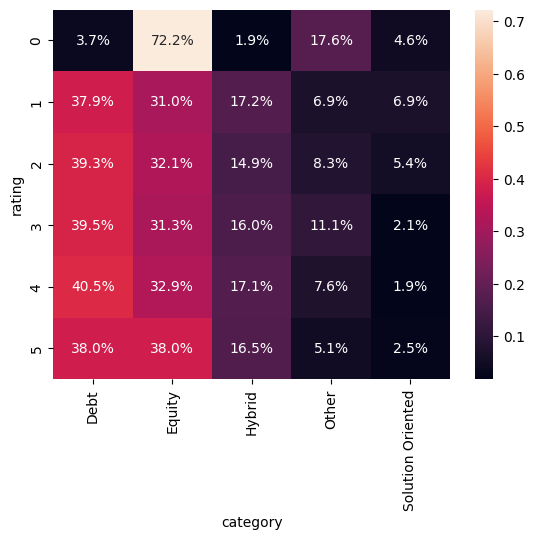

In [129]:
# lets check why 0 rating is giving higher returns
sns.heatmap(pd.crosstab(df['rating'],df['category'],normalize='index'),annot=True,fmt='.1%')

Findings

Equity constitutes 72% in 0 rating

Other ratings has somewhat equal distribution.

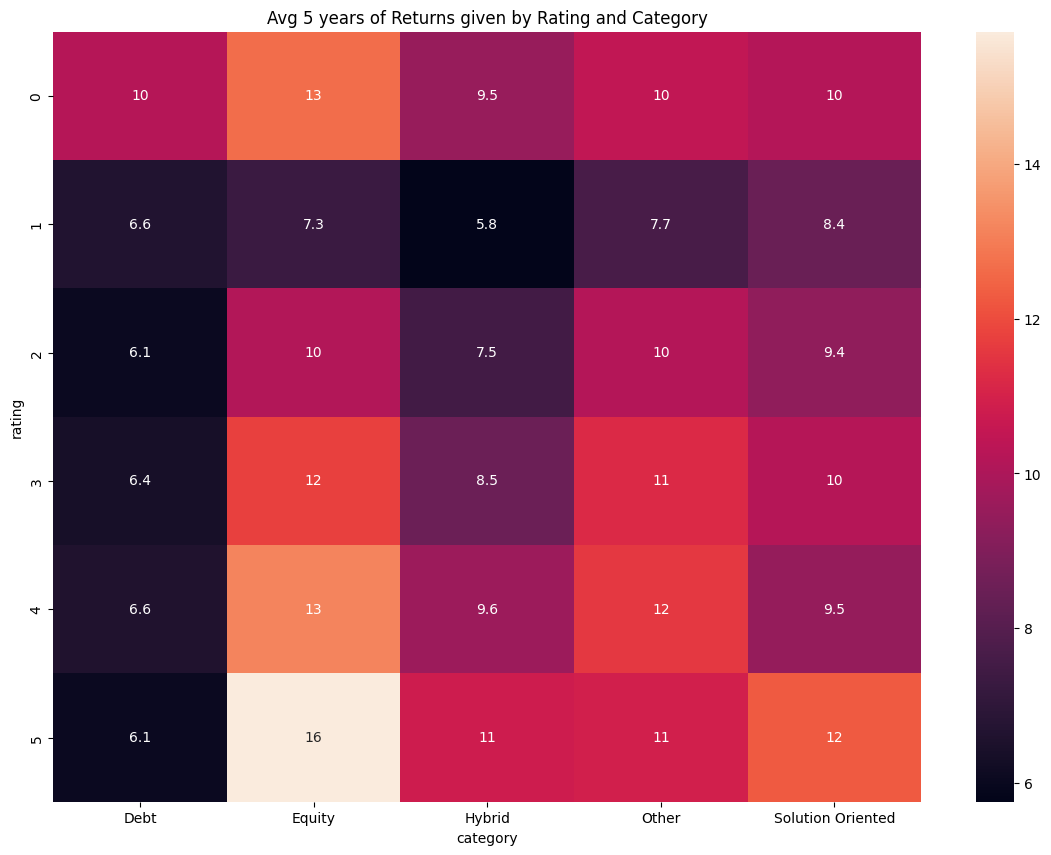

In [130]:
plt.figure(figsize=(14,10))
sns.heatmap(pd.pivot_table(df,index='rating',columns='category',values='returns_5yr'),annot=True,fmt='.2g')
plt.title('Avg 5 years of Returns given by Rating and Category')
plt.show()

Findings

Leaving 0 rating category, we can say that higher the rating higher returns.

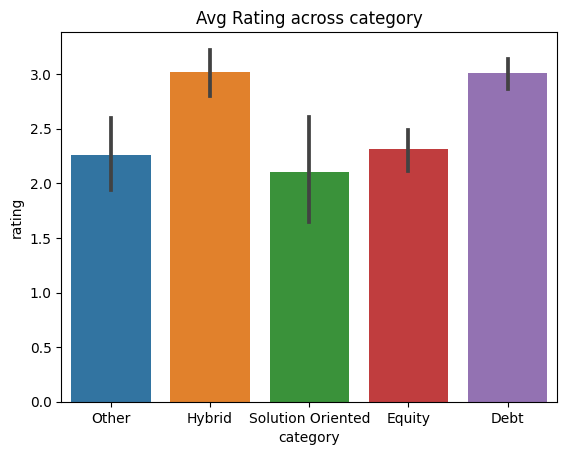

In [131]:
sns.barplot(df,x='category',y='rating')
plt.title('Avg Rating across category')
plt.show()

## Analysis on alpha

Alpha is defined as the excess return of the mutual fund over the benchmark return, on a risk-adjusted basis.

Risk-adjusted basis means we need to –

Calculate the difference between the mutual fund returns and the risk-free return. Calculate the difference between the benchmark return and the risk-free return, multiply this by the beta. Take the difference between 1 and 2

Mathematically,

Alpha = (MF Return – riskfree return) – (Benchmark return – riskfree return)*Beta

Lets put this in context with an example. Assume a certain fund gives you a return of 10%, its benchmark returns for the same duration is 7%. The beta of the fund is 0.75. What do you think the alpha assuming the risk-free rate is 4%?

Let’s apply the for formula and check –

Alpha = (10%-4%)-(7%-4%)*0.75 = 6% – 2.25% = 3.75% or 0.0375

As you can see, the alpha is not just the difference between the fund and its benchmark, which if true, the alpha would have been – 10% – 7% =3%

But rather, the alpha is 3.75%.

The fund has managed to generate a 10% return compared to the Index’s 7% while managing to stay significantly less volatile (remember beta  is just 0.75). Hence we are rewarding the fund for its good behaviour or less volatile behaviour. Therefore the alpha is 3.75% as opposed to just 3%.

Now, imagine the same fund, with the same returns, but the beta is 1.3 instead of 0.75. What do you think is the alpha? By now, you should guess that since the beta is high, the fund gets penalised for its erratic behaviour. Therefore the alpha should be lower.

Let us see if the numbers agree to this thought.

Alpha = (10%-4%)-(7%-4%)*1.3 = 6% – 3.9% = 2.1%

See that? While the returns remain the same, thanks to beta, the alpha is significantly lesser on a risk-adjusted basis.

To conclude, alpha is the excess return of the fund over above the benchmark returns. Alpha is a risk-adjusted. The fund is rewarded if the returns are generated by keeping a low-risk profile and penalized for being volatile.

By now, you must have realized that volatility plays an important role in measuring mutual funds performance. Beta is a measure of volatility; it tells us how risky the fund is when compared to its benchmark. Beta is a relative risk and does not reveal the fund’s inherent risk.

The inherent risk of a fund is revealed by the ‘Standard Deviation’ of the fund.

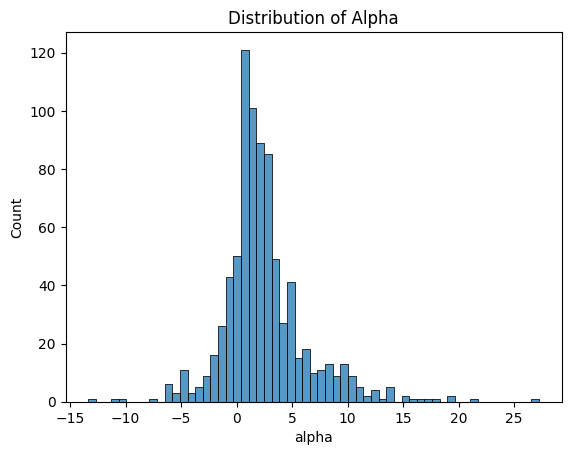

In [132]:
sns.histplot(df['alpha'])
plt.title('Distribution of Alpha')
plt.show()

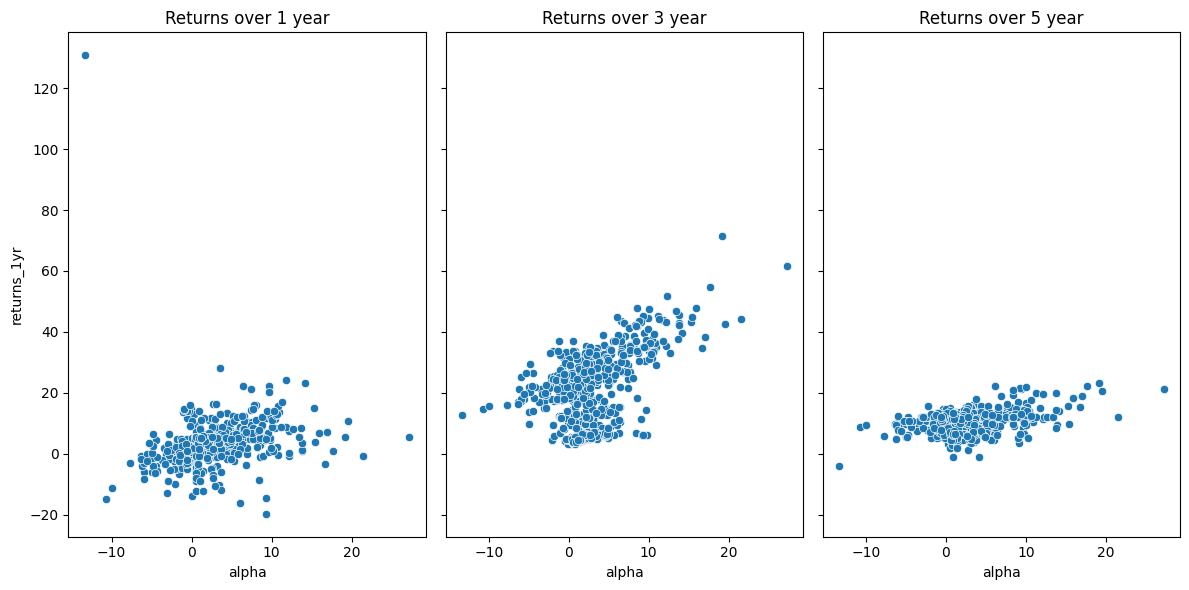

In [133]:
# high alpha value has higher returns 

# Create figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6),sharey='row')

# Create a scatter plot for each axis
sns.scatterplot(df,x='alpha',y='returns_1yr',ax=axes[0])
sns.scatterplot(df,x='alpha',y='returns_3yr',ax=axes[1])
sns.scatterplot(df,x='alpha',y='returns_5yr',ax=axes[2])

# Set the title for each axis
axes[0].set_title('Returns over 1 year')
axes[1].set_title('Returns over 3 year')
axes[2].set_title('Returns over 5 year')

plt.tight_layout()
plt.show()

Findings

Returns are higher for high Alpha

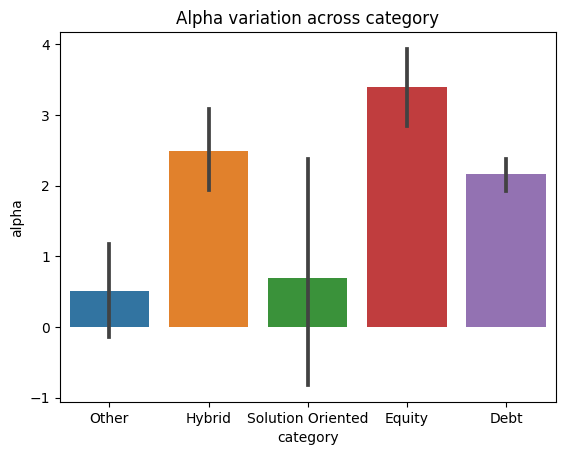

In [134]:
# alpha vs category
sns.barplot(df,x='category',y='alpha')
plt.title('Alpha variation across category')
plt.show()

Findings

Equity has highest Alpha

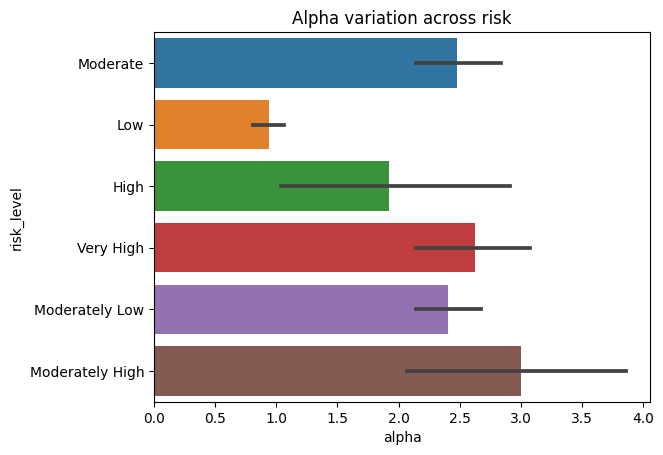

In [135]:
# alpha vs risk
sns.barplot(df,y='risk_level',x='alpha')
plt.title('Alpha variation across risk')
plt.show()

Findings

Moderately high risk has high Alpha

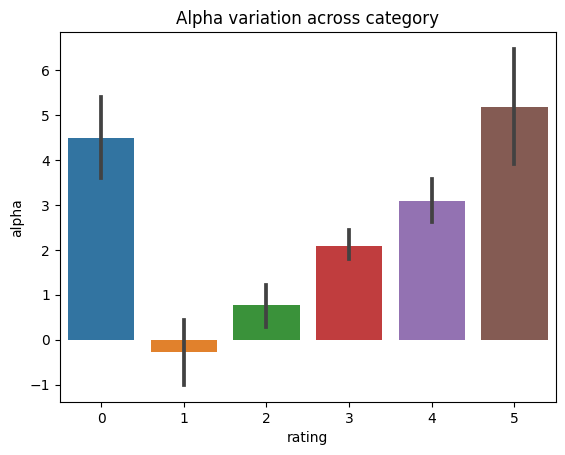

In [136]:
# alpha vs rating
sns.barplot(df,x='rating',y='alpha')
plt.title('Alpha variation across category')
plt.show()

Finding

5 Rated fund has high Alpha

Again since 0 rated fund has mostly Equity category and we have seen Equity category has high Alpha

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


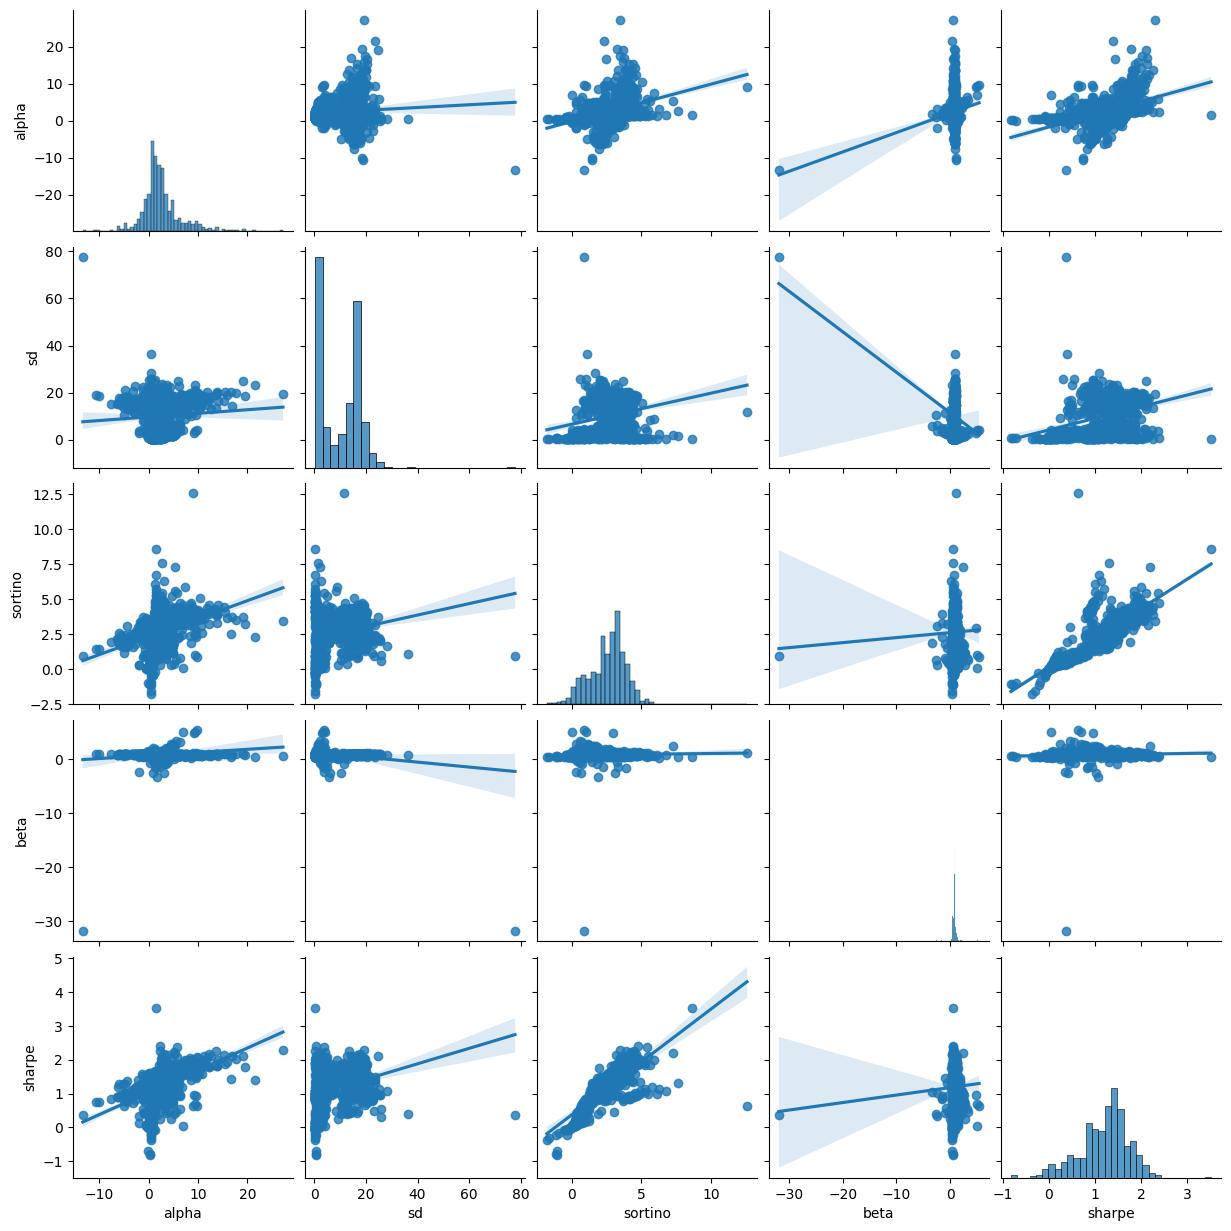

In [137]:
sns.pairplot(df,vars=['alpha','sd','sortino','beta','sharpe'],kind='reg')

Findings

Sharpe and Alpha are positively correlated.

Sortino and Sharpe are positively correlated.

Sortino and Alpha are positively correlated.

## Analysis of Standard deviation (sd)

The standard deviation of a stock or a mutual fund represents the riskiness of the stock or the mutual fund. Higher the standard Deviation, higher is the volatility of the asset. Higher the volatility, higher is the risk.

For example consider these 2 funds - The SD of the small-cap fund is 23.95% while the long term equity is 19.33%, which implies that the small-cap fund is way riskier compared to the long term equity fund.

To put this context, if you invest Rs.10,000/- across funds at the same time, then by the end of the year the profit or loss can be anywhere in this range –

Loss = Investment * (1-SD)

Gains = Investment * (1+SD)

image.png

The larger the SD, the larger the possibility of loss or gains.

Generally speaking, the SD for mid and small-cap funds are higher compared to large-cap stocks.

Do note, volatility or Standard Deviation should not worry you. Markets are volatile, and equities are volatile, mutual funds are volatile; this is the very nature of markets. So if you can’t fathom watching your investment see-saw between gains and loss, then perhaps you should reconsider your investment decision in equities.

But if you do invest in equities, then you need to learn to manage volatility. There are two ways to deal with this beast called ‘Volatility’ –

Diversify smartly (and not over diversify)
Give your investment time

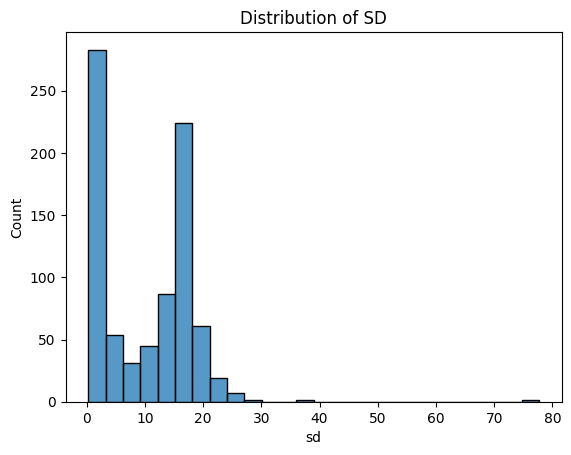

In [138]:
sns.histplot(df['sd'])
plt.title('Distribution of SD')
plt.show()

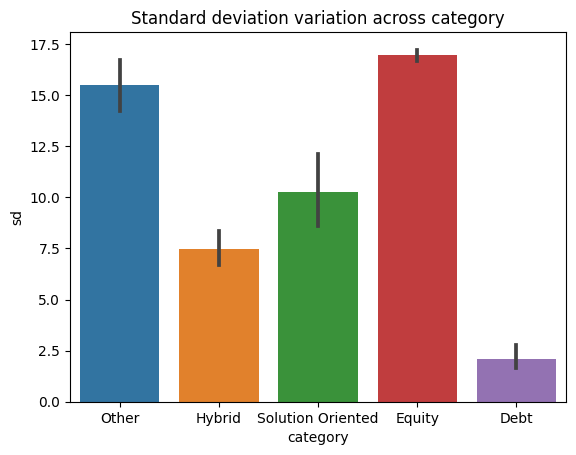

In [139]:
# sd vs category
sns.barplot(df,x='category',y='sd')
plt.title('Standard deviation variation across category')
plt.show()

Findings

Equity has high SD means it is more volatile

Debt has less SD means it is less volatile.

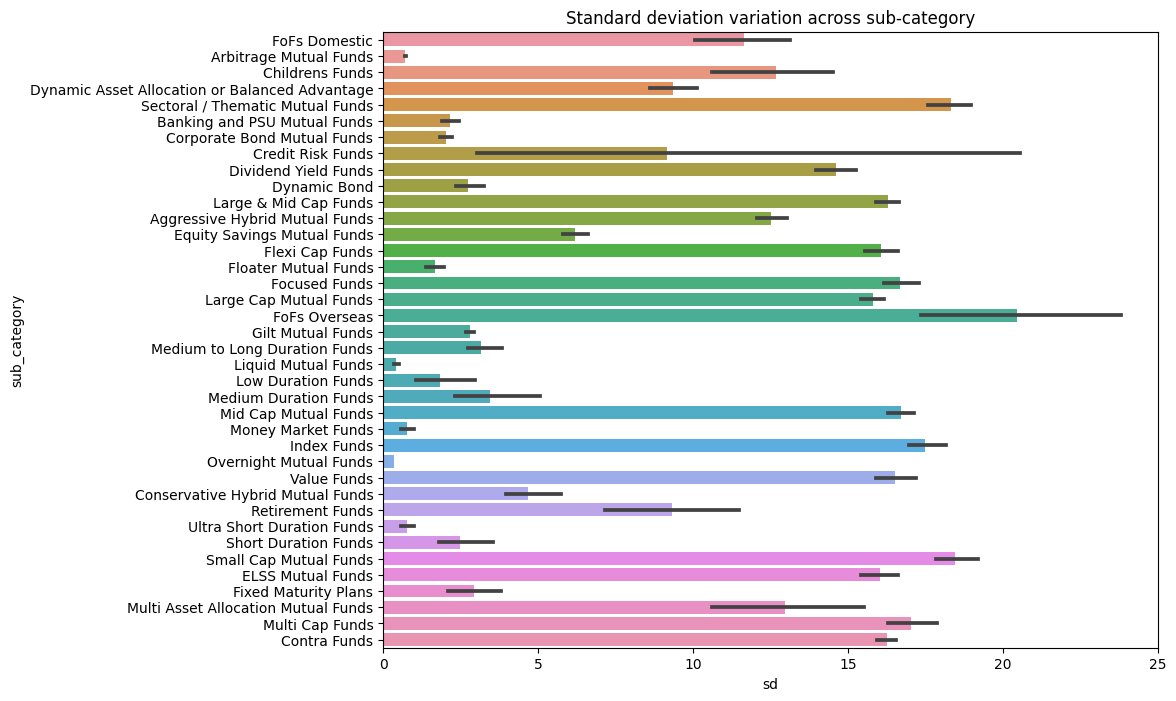

In [140]:
# sd vs sub category
plt.figure(figsize=(10,8))
sns.barplot(df,y='sub_category',x='sd')
plt.title('Standard deviation variation across sub-category')
plt.show()

Findings

FoFs Overseas has highest volatility and it should be invested for long duration.

For short duration investment Liquid and Overnight funds are more suitable as they are less volatile.

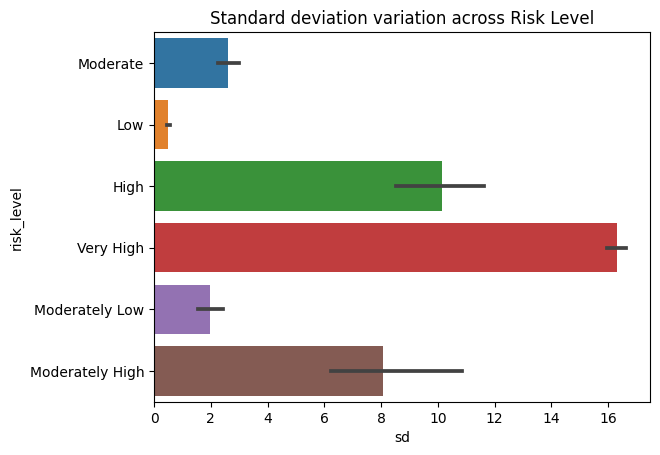

In [141]:
# sd vs risk
sns.barplot(df,y='risk_level',x='sd')
plt.title('Standard deviation variation across Risk Level')
plt.show()

Findings

Very High risk category has high SD

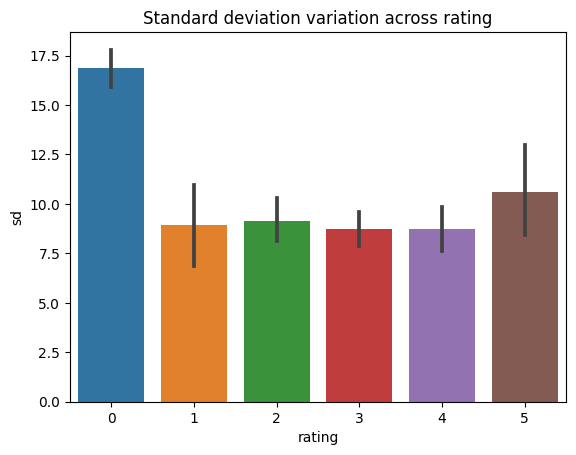

In [142]:
# sd vs rating
sns.barplot(df,x='rating',y='sd')
plt.title('Standard deviation variation across rating')
plt.show()

Findings

Rating 0 and Rating 5 has most of the Equity Category hence higher SD

## Analysis of beta

Beta = Covariance between mutual fund and benchmark / Variance of benchmark index

A beta of 1 indicates that the mutual fund has the same level of volatility as the benchmark index. A beta of less than 1 indicates lower volatility, while a beta of greater than 1 indicates higher volatility.

For example, the Quant Small Cap Fund has a beta of 0.92, hence the fund is slightly less risky compared to its benchmark. I say slightly because it’s very close to 1. This implies, if Nifty Small Cap 250 Index falls by 1%, then Quant Small Cap Fund is expected to fall by 0.92%.

If the beta was 0.6 or 0.65, the fund is less risk or less volatile compared to its benchmark. Why? Because if Nifty Small Cap 250 Index falls by 1%, then Quant Small Cap Fund is expected to fall by only 0.65% and not 0.95%.

This is what I mean by ‘relative risk’; it gives us a perspective of how risky the fund is compared to its benchmark.

When you are looking at the Beta of a stock or an MF, it is very important to recognize the fact that the beta is a measure of relative risk, it tells us how risky the stock or MF is compared to its benchmark. Beta is not an indicator of the inherent risk of the stock or MF.

To put this in context, think about it this way, Ferrari is faster compared to a BMW, this comparison is like the beta. We measure the speed of car one against car two. But does this give you any indication of how fast the Ferrari is? Not really.

Likewise, while beta gives us a perspective of the relative riskiness of an asset, it does not give us the absolute or the inherent risk of the asset itself.

By now, you must have built your perception of beta. Let me ask you this – if a mutual fund has a high beta, do you think it is bad?

Well, the good, bad, ugly part of beta depends on another metric called the ‘Alpha’.

To know more about Mutual Fund Metrics - refer to Zerodha varsity



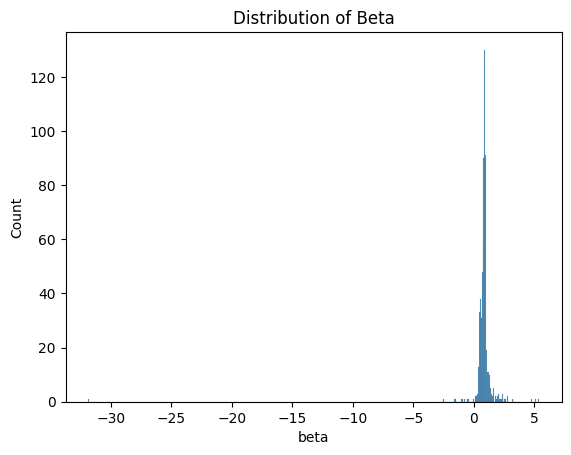

In [143]:
sns.histplot(df['beta'])
plt.title('Distribution of Beta')
plt.show()

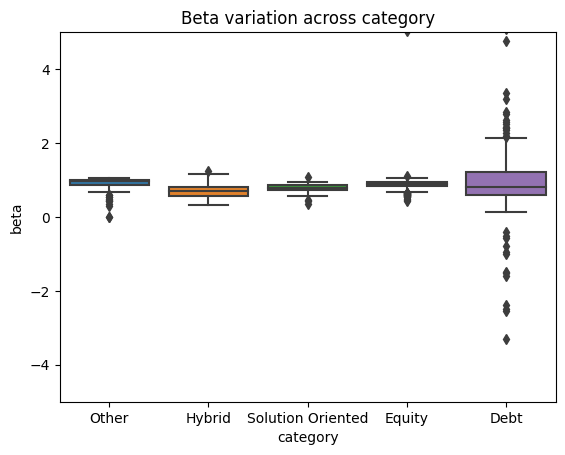

In [144]:
# category vs beta
sns.boxplot(df,x='category',y='beta')
plt.ylim(-5,5)
plt.title('Beta variation across category')
plt.show()

Findings

Debt funds has negative beta it means when market will go down then returns for these funds will increase and vice versa.

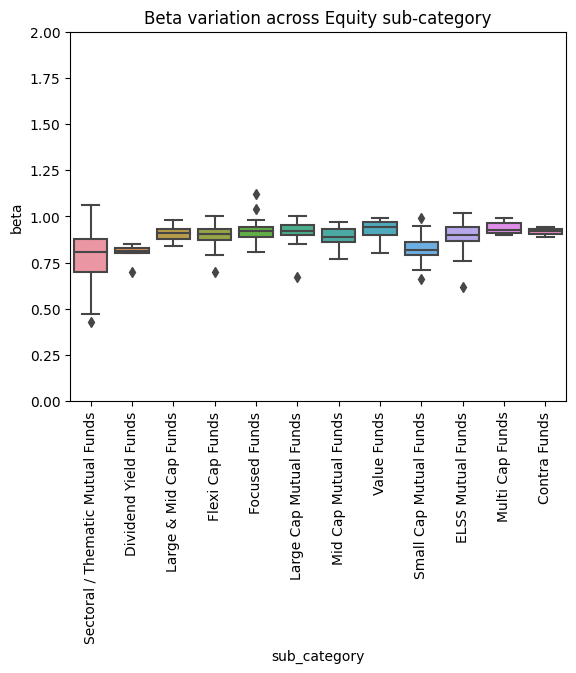

In [145]:
# equity mutual funds has high beta
sns.boxplot(equity_df,x='sub_category',y='beta',)
plt.xticks(rotation='vertical')
plt.ylim(0,2)
plt.title('Beta variation across Equity sub-category')
plt.show()

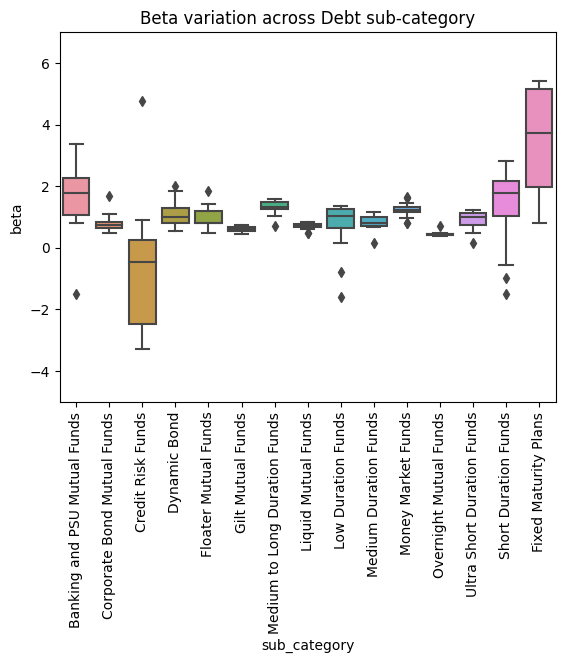

In [146]:
# debt mutual funds has high beta variations

sns.boxplot(debt_df,x='sub_category',y='beta')
plt.xticks(rotation='vertical')
plt.ylim(-5,7)
plt.title('Beta variation across Debt sub-category')
plt.show()

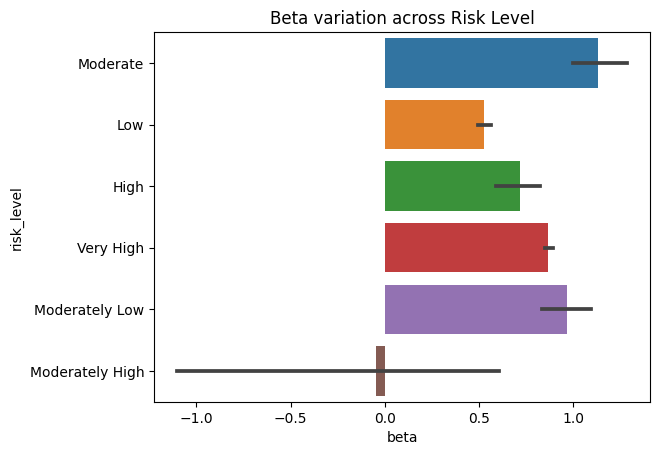

In [147]:
# beta vs risk
sns.barplot(df,y='risk_level',x='beta')
plt.title('Beta variation across Risk Level')
plt.show()

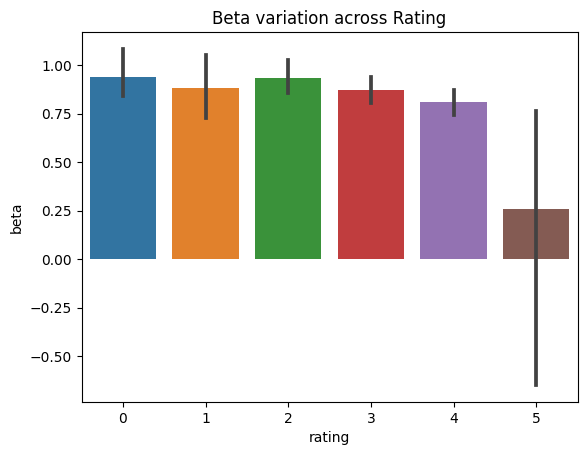

In [148]:
# beta vs rating
sns.barplot(df,x='rating',y='beta')
plt.title('Beta variation across Rating')
plt.show()

## Analysis on Sharpe

Assume, there are two large-cap funds -Fund A and Fund B. Here is how they have performed in terms of returns –

Fund A – 14%

Fund B – 16%

Which of the two funds are better? Well, Fund B has a higher return, so without a doubt, Fund B is a better fund.

Now, consider the following –

image.png

Rf is the risk-free return. Along with the fund’s return, I’ve also stated the standard deviation/volatility/risk of the two funds. Now, which of the two funds do you think is better?

I guess it gets a little complex to figure out which these two funds are better given that we have to evaluate them on two parameters, i.e. both the risk and return.

Ignoring the risk, purely on a return basis, Fund B is better. Ignoring the return, purely on a risk basis, Fund A is better. But in reality, you cannot isolate risk and reward; you need to factor in both these and figure out which of these two are better.

The Sharpe Ratio helps us here. It bundles the concept of risk, reward, and the risk-free rate and gives us a perspective.

Sharpe ratio = [Fund Return – Risk-Free Return]/Standard Deviation of the fund

Lets apply the math for Fund A –

= [14% – 6%] / 28%

= 8%/28%

= 0.29

The number tells us that the fund generates 0.29 units of return (over and above the risk-free return) for every unit of risk undertaken.Naturally, by this measure, the higher the Sharpe ratio, the better it is as we all want higher returns for every unit of risk undertaken.

Lets see how this turns out for Fund B –

= [16% – 6% ] / 34%

= 10% / 34%

= 0.29

So it turns out that both the funds are similar in terms of their risk and reward perspective. And there is no advantage of choosing Fund A over Fund B.

Do note, Sharpe ratio considers only price based risk. It does not consider credit or interest rate risk. Hence, there is no point looking at the Sharpe ratio for debt funds.

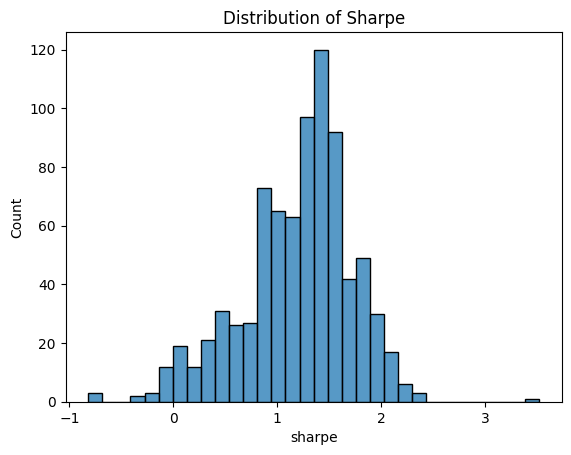

In [149]:
sns.histplot(df['sharpe'])
plt.title('Distribution of Sharpe')
plt.show()

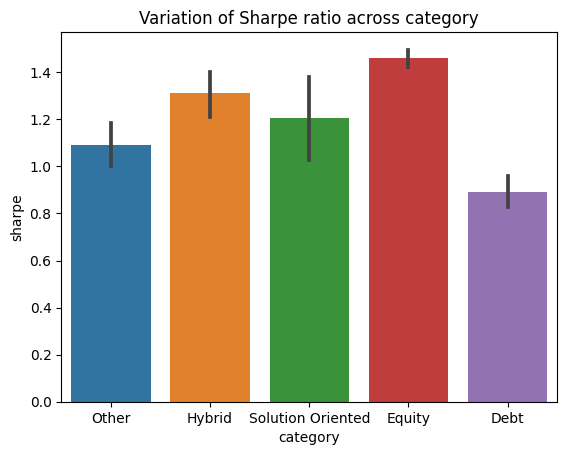

In [150]:
# category vs sharpe
sns.barplot(df,x='category',y='sharpe')
plt.title('Variation of Sharpe ratio across category')
plt.show()

Findings

Equity fund has highest Sharpe Ratio

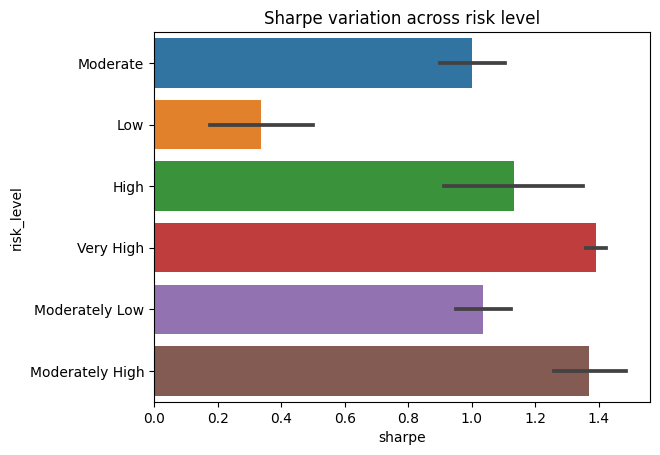

In [151]:
# sharpe vs risk
sns.barplot(df,y='risk_level',x='sharpe')
plt.title('Sharpe variation across risk level')
plt.show()

Findings

Very High and Moderately High has somewhat same average Sharpe

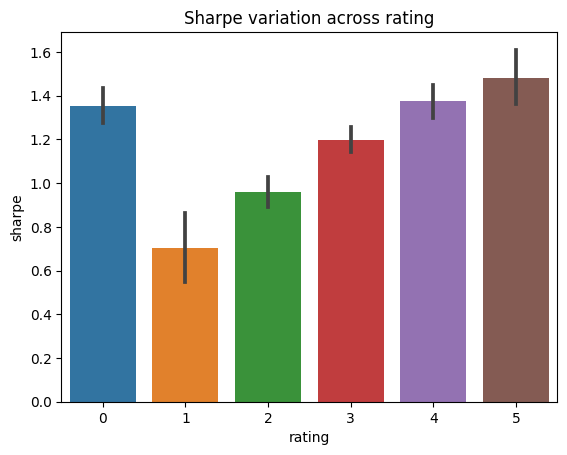

In [152]:
# sharpe vs rating
sns.barplot(df,x='rating',y='sharpe')
plt.title('Sharpe variation across rating')
plt.show()

Findings

As rating increases sharpe ratio also increases

## Analysis on Sortino

The Sortino’s ratio is an improvisation over the Sharpe Ratio, wherein the denominator has only the negative returns or the ‘downside risk’, is considered.

Hence, the Sortino’s Ratio is –

= [Fund Return – Risk-Free Return]/Downside Risk

The objective of Sortino’s ratio is to estimate the excess return adjusted for only the downside risk. Like the Sharpe ratio, higher the Sortino’s ratio, better it is.

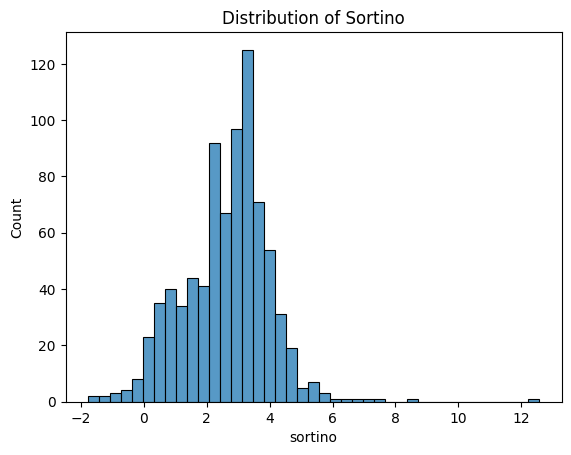

In [153]:
sns.histplot(df['sortino'])
plt.title('Distribution of Sortino')
plt.show()

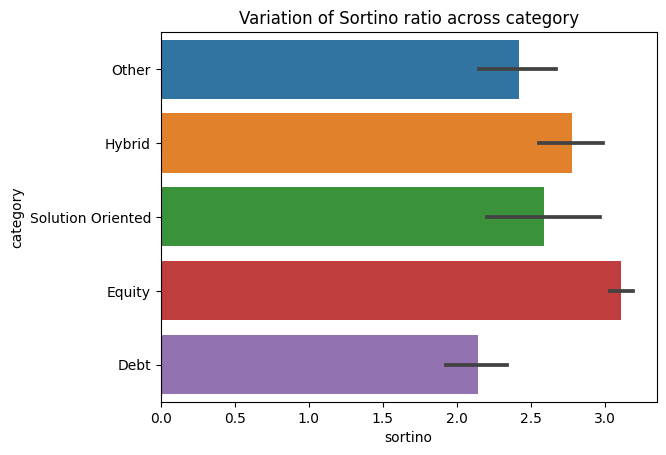

In [154]:
 # category vs sortino
sns.barplot(df,y='category',x='sortino')
plt.title('Variation of Sortino ratio across category')
plt.show()

Findings

Equity has highest Sortino

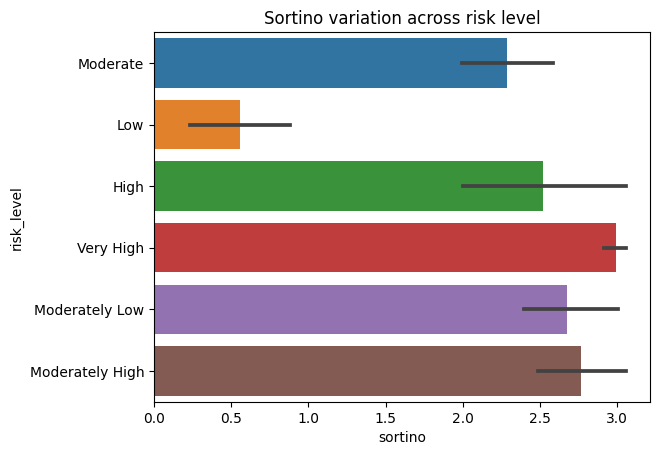

In [155]:
# sortino vs risk level
sns.barplot(df,y='risk_level',x='sortino')
plt.title('Sortino variation across risk level')
plt.show()

Findings

Very High Risk category has high sortino

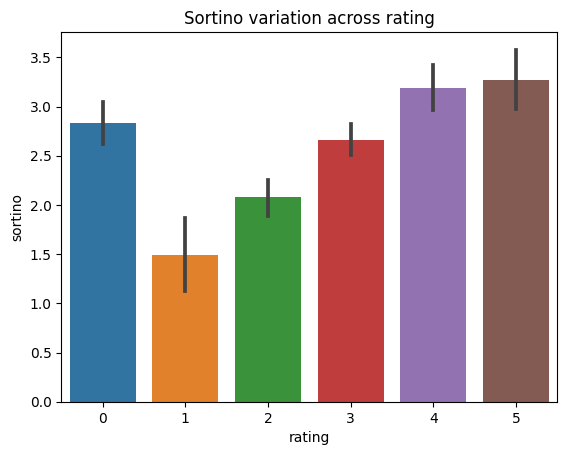

In [156]:
# sortino vs rating
sns.barplot(df,x='rating',y='sortino')
plt.title('Sortino variation across rating')
plt.show()

Finding:

Rating and sortino are positively correlated

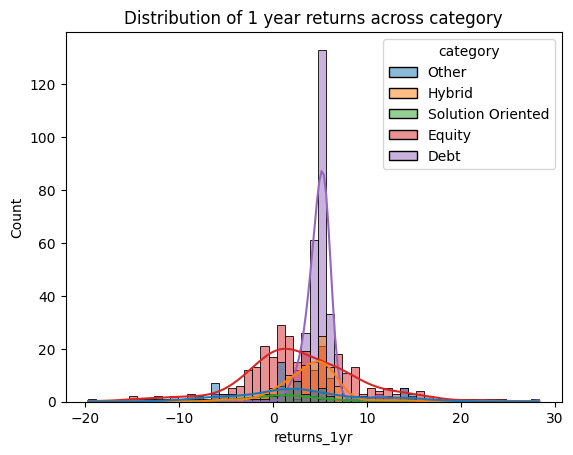

In [157]:
sns.histplot(df[df['returns_1yr']<30],x='returns_1yr',hue='category',kde=True)
plt.title('Distribution of 1 year returns across category')
plt.show()

Findings

For 1 year investment Debt fund has performed well. Other category may give negative returns as well.

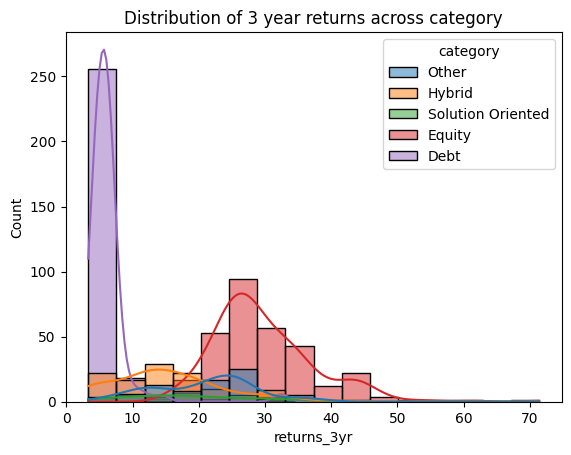

In [158]:
sns.histplot(df,x='returns_3yr',hue='category',kde=True)
plt.title('Distribution of 3 year returns across category')
plt.show()

Findings

Equity has outperformed every other category for 3 years performance.

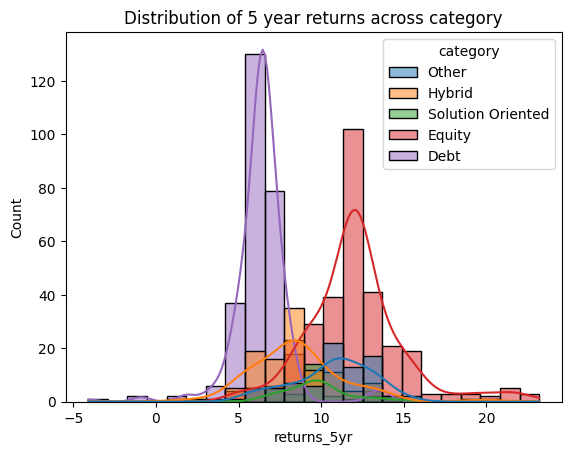

In [159]:
sns.histplot(df,x='returns_5yr',hue='category',kde=True)
plt.title('Distribution of 5 year returns across category')
plt.show()

Findings

Equity has outperformed every other category for 5 years performance.

In [160]:
# top schemes in each category and sub category in terms of returns earned

category_idx = df.groupby("category")["returns_5yr"].idxmax()
category_result = df.loc[category_idx, ["category", "scheme_name", "returns_5yr"]]

In [161]:
category_result

category                                        scheme_name  \
63                Debt                   AXIS FTP – Series 104 – 1112Days   
608             Equity                               Quant Small Cap Fund   
607             Hybrid                             Quant Multi Asset Fund   
456              Other  Kotak Multi Asset Allocator FoF – Dynamic – Di...   
252  Solution Oriented                       HDFC Retirement Savings Fund   

     returns_5yr  
63          14.0  
608         23.2  
607         20.5  
456         15.3  
252         14.8

In [162]:
sub_cat_idx = df.groupby("sub_category")["returns_5yr"].idxmax()
sub_catresult = df.loc[sub_cat_idx, ["sub_category", "scheme_name", "returns_5yr"]]

In [163]:
sub_catresult

sub_category  \
599                  Aggressive Hybrid Mutual Funds   
86                           Arbitrage Mutual Funds   
182                    Banking and PSU Mutual Funds   
226                                 Childrens Funds   
436                Conservative Hybrid Mutual Funds   
623                                    Contra Funds   
267                     Corporate Bond Mutual Funds   
306                               Credit Risk Funds   
753                            Dividend Yield Funds   
223  Dynamic Asset Allocation or Balanced Advantage   
275                                    Dynamic Bond   
609                               ELSS Mutual Funds   
487                     Equity Savings Mutual Funds   
63                             Fixed Maturity Plans   
601                                 Flexi Cap Funds   
313                            Floater Mutual Funds   
456                                   FoFs Domestic   
178                                   FoFs Overseas   
371                                   Focused Funds   
157                               Gilt Mutual Funds   
556                                     Index Funds   
501                           Large & Mid Cap Funds   
126                          Large Cap Mutual Funds   
413                             Liquid Mutual Funds   
32                               Low Duration Funds   
34                            Medium Duration Funds   
555                   Medium to Long Duration Funds   
606                            Mid Cap Mutual Funds   
193                              Money Market Funds   
607             Multi Asset Allocation Mutual Funds   
600                                 Multi Cap Funds   
812                          Overnight Mutual Funds   
252                                Retirement Funds   
715                Sectoral / Thematic Mutual Funds   
345                            Short Duration Funds   
608                          Small Cap Mutual Funds   
538                      Ultra Short Duration Funds   
351                                     Value Funds   

                                           scheme_name  returns_5yr  
599                                Quant Absolute Fund    19.100000  
86                        Bank of India Arbitrage Fund     8.581053  
182                  Edelweiss Banking & Psu Debt Fund     7.900000  
226                          HDFC Children’s Gift Fund    12.900000  
436                             Kotak Debt Hybrid Fund    10.000000  
623                                    SBI Contra Fund    15.600000  
267                           HSBC Corporate Bond Fund    13.300000  
306                         ICICI Pru Credit Risk Fund     8.100000  
753                 Templeton India Equity Income Fund    14.500000  
223                       HDFC Balanced Advantage Fund    12.900000  
275                               HSBC Flexi Debt Fund    13.300000  
609                      Quant Tax Plan- Direct Growth    22.200000  
487              Mahindra Manulife Equity Savings Fund    13.300000  
63                    AXIS FTP – Series 104 – 1112Days    14.000000  
601                               Quant Flexi Cap Fund    18.200000  
313                   ICICI Pru Floating Interest Fund     7.200000  
456  Kotak Multi Asset Allocator FoF – Dynamic – Di...    15.300000  
178                              DSP World Mining Fund    15.000000  
371                           IIFL Focused Equity Fund    18.100000  
157                                     DSP G-Sec Fund     8.600000  
556                            Nippon India Index Fund    13.000000  
501                 Mirae Asset Emerging Bluechip Fund    15.100000  
126                 Canara Robeco Bluechip Equity Fund    14.400000  
413                                    ITI Liquid Fund     6.385446  
32                   Aditya Birla SL Low Duration Fund     7.000000  
34    Aditya Birla SL Medium Term Plan – Direct Growth     8.600000  
555